<a href="https://colab.research.google.com/github/vbarb0033/vbarb003/blob/main/Corruption_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Corruption on Foreign Aid Effectivness: How Will Corruption Effect Future Foreign Aid Flows?
A study on the relationship between corruption and foreign aid. *How does the rise in global technology affect this relationsip?*

##**Trial** **1**
Preliminary analysis of datatset; includes importing & loading, reviewing the data, describing the data, fitting for outliers, Ridge Regression, Lasso Regression, and preliminarily splitting, training, and testing just to see how it works.

In [2]:
# importing & loading data
from google.colab import drive
drive.mount('/content/drive')

# importing necessary libraries
!pip install dmba

from dmba import regressionSummary
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# load my dataset
corruption_df = pd.read_csv('/content/drive/MyDrive/MS Data Analytics/FALL SEMESTER/MSA550/PROJECT/Corruption Data.csv')
x = corruption_df.drop(columns=['Country', 'GDPC'])
y = corruption_df['GDPC']
print(corruption_df.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 18.2 MB/s eta 0:00:00
Colab environment detected.
       Country  ID    YR   GDPC         AID        FDI  WAR       CC       GE  \
0  Afghanistan   1  1996  183.0    28000000     690000    1 -1.29170 -2.17520   
1  Afghanistan   1  1997  170.0    28000000   -1460000    1 -1.23385 -2.13875   
2  Afghanistan   1  1998  157.0    28000000     -10000    1 -1.17600 -2.10230   
3  Afghanistan   1  1999  141.0    28000000    6040000    1 -1.22385 -2.13810   
4  Afghanistan   1  2000  180.2    28000000     170000    1 -1.27170 -2.17390   
5  Afghanistan   1  2001  142.9    28228258     680000    1 -1.25110 -1.58770   
6  Afghanistan   1  2002  182.2   400296708   50000000    1 -1.25114 -1.58769   
7  Afghanistan   1  2003  199.6   703345175   57800000    1 -1.34418 -1.12742   
8  Afghanistan   1  2004  221.8  12

In [3]:
# Reviewing the data
# 1. Review Data Types
print("Data types of each column:")
print(corruption_df.dtypes)
corruption_df['FDI'] = pd.to_numeric(corruption_df['FDI'], errors='coerce')

# 2. Explore Unique Values
print("\nUnique values for each column:")
for column in corruption_df.columns:
  print(f"\nColumn: {column}")
  print(corruption_df[column].unique())

# 3. Statistical Summary
print("\nSummary statistics for numerical columns:")
print(corruption_df.describe())

# 4. Check for Missing Values
print("\nMissing values in each column:")
print(corruption_df.isnull().sum())

Data types of each column:
Country     object
ID           int64
YR           int64
GDPC       float64
AID          int64
FDI          int64
WAR          int64
CC         float64
GE         float64
PS         float64
RQ         float64
RL         float64
VA         float64
dtype: object

Unique values for each column:

Column: Country
['Afghanistan' 'Lebanon' 'Somalia' 'Syria' 'Ukraine' 'Ethiopia'
 'South Sudan' 'Jordan' 'Yemen ' 'Nigeria' 'Iraq' 'Egypt' 'Kenya' 'Russia'
 'Zimbabwe' 'Azerbaijan' 'Haiti' 'Liberia' 'DR Congo' 'Niger' 'Pakistan'
 'Indonesia']

Column: ID
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]

Column: YR
[1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]

Column: GDPC
[  183.     170.     157.     141.     180.2    142.9    182.2    199.6
   221.8    254.1    274.     376.3    382.5    453.4    562.5    608.7
   653.4    638.7    626.5    566.9    523.1    5

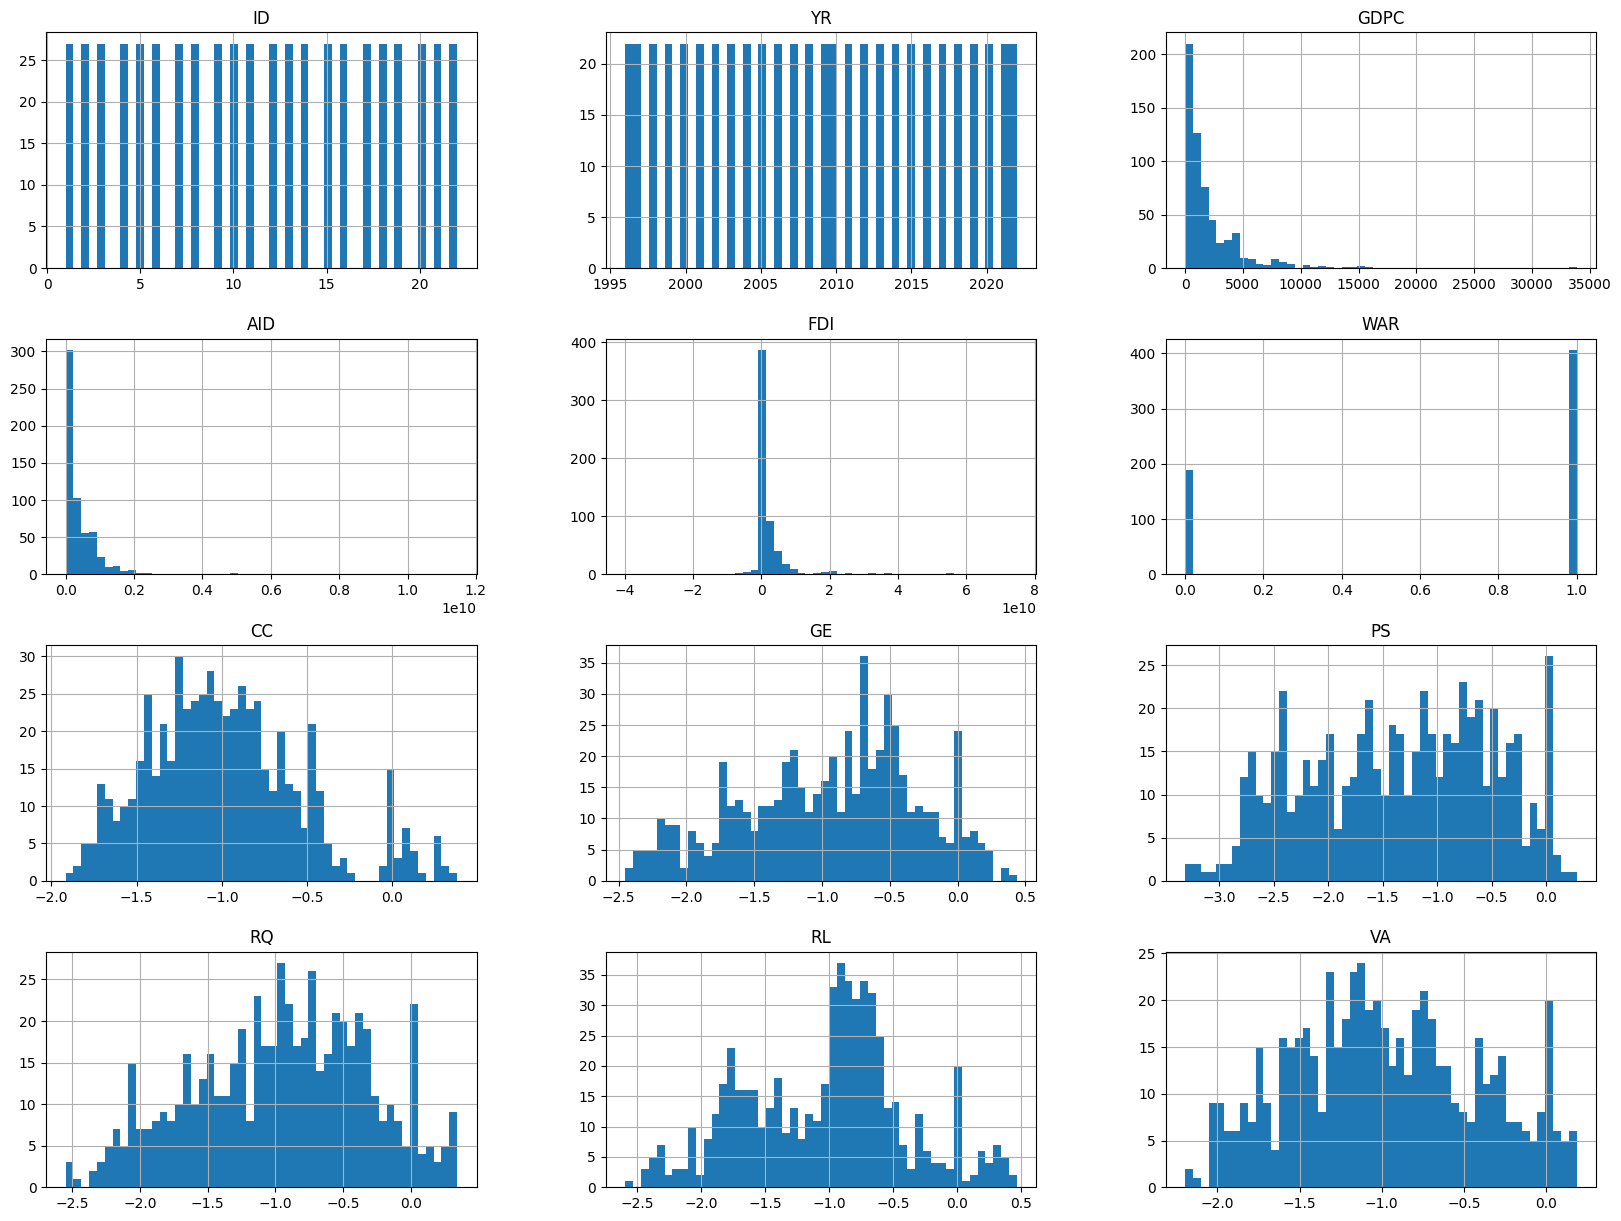

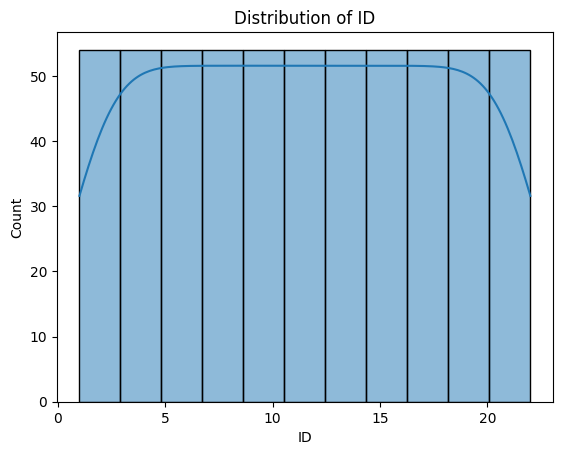

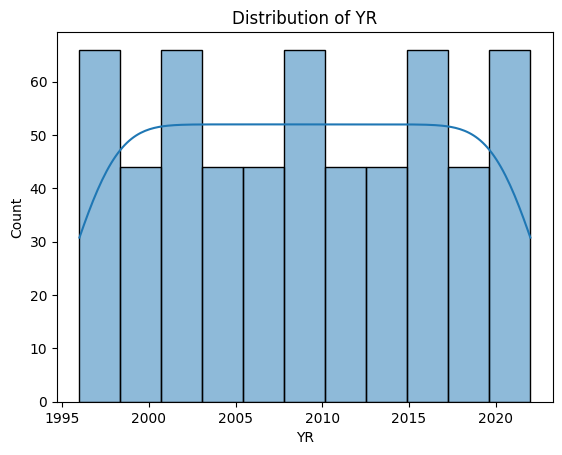

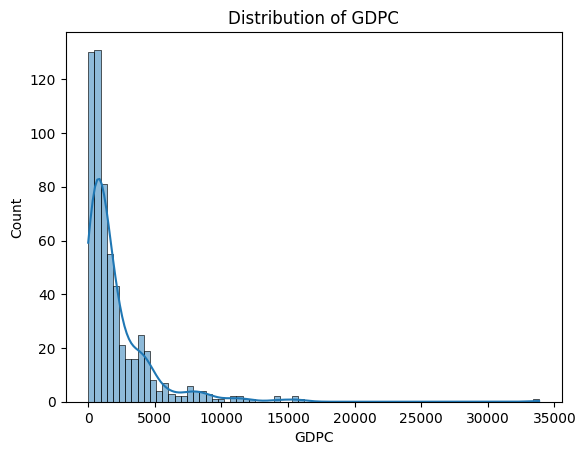

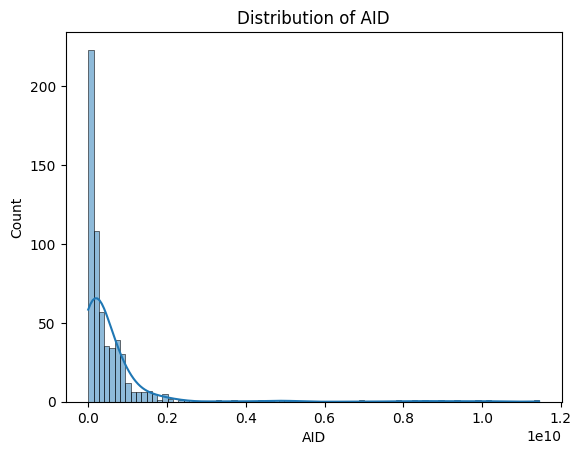

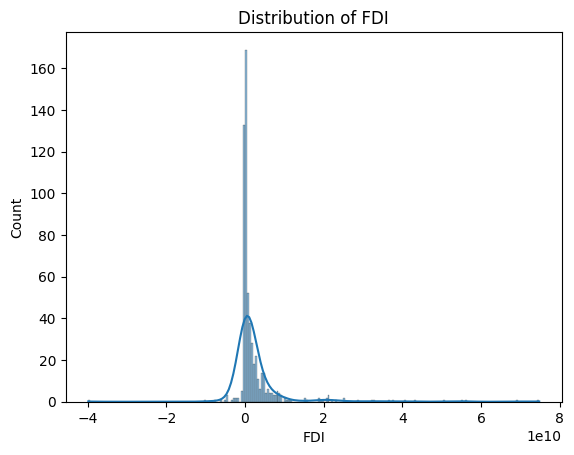

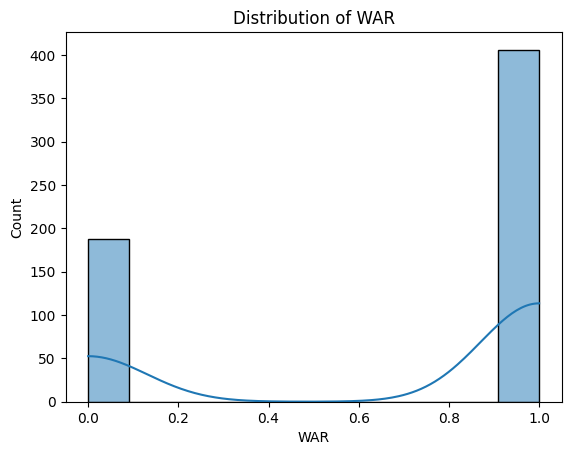

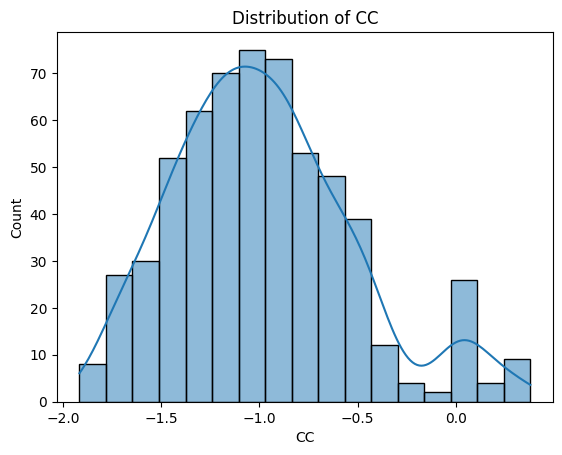

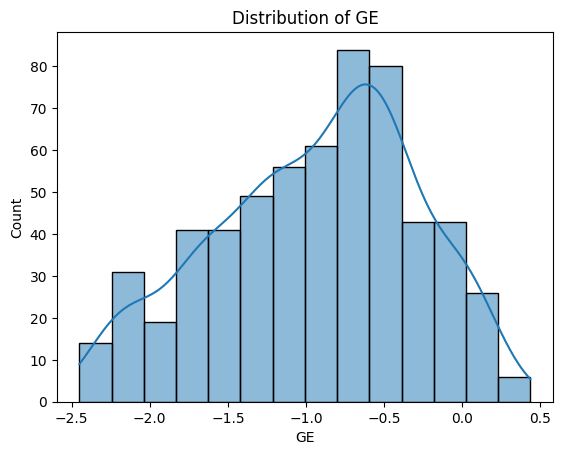

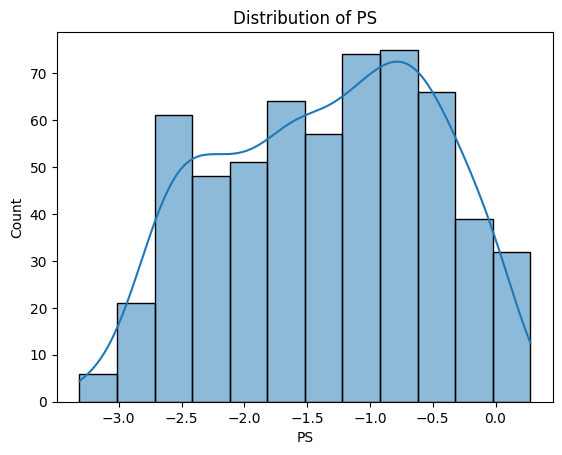

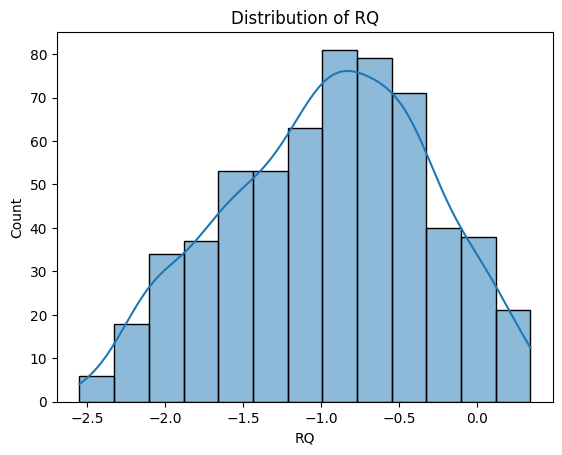

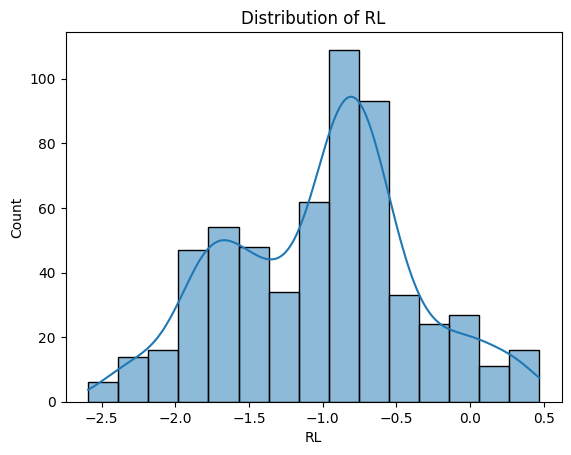

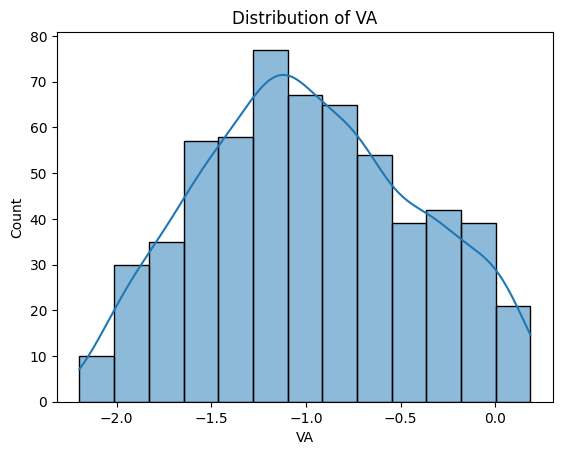

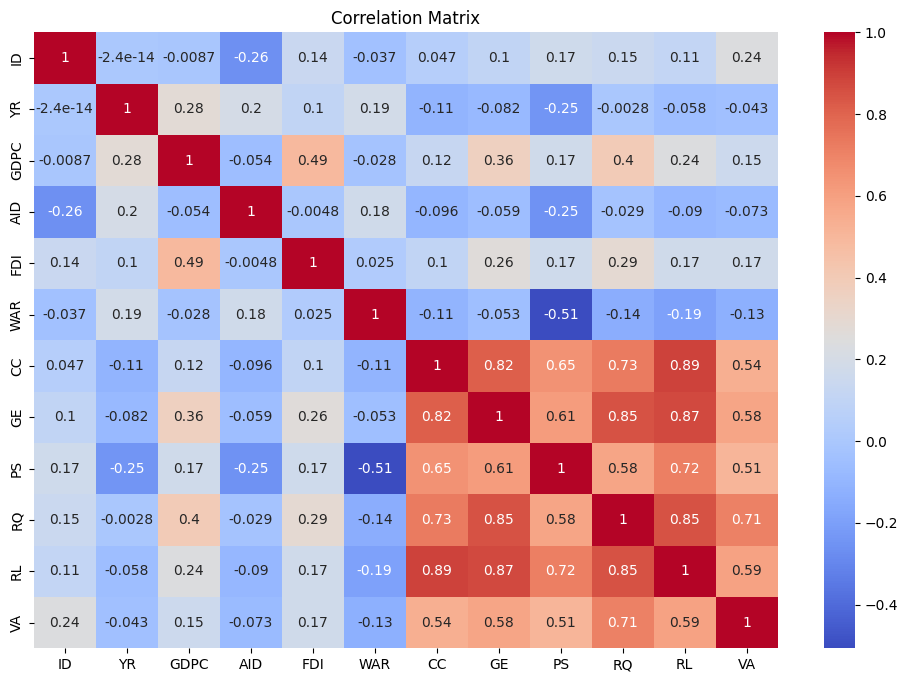

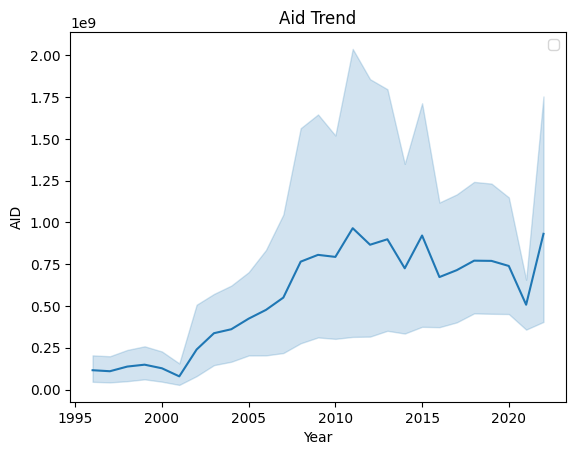

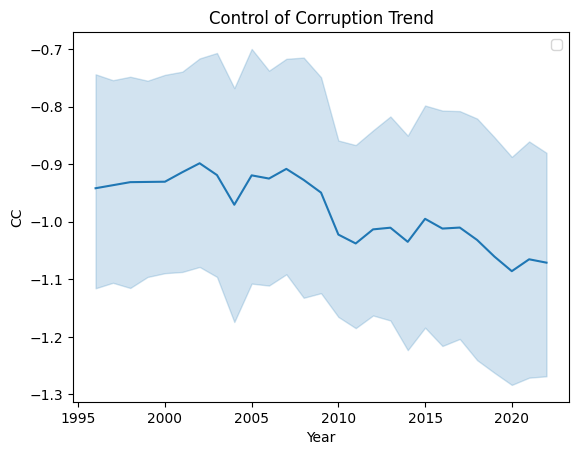

   Feature        VIF
0       ID   5.162964
1       YR  15.071297
2     GDPC   2.641594
3      AID   1.427603
4      FDI   1.564983
5      WAR   5.244825
6       CC  33.172238
7       GE  19.203858
8       PS  12.088643
9       RQ  22.316774
10      RL  38.030195
11      VA   9.354972


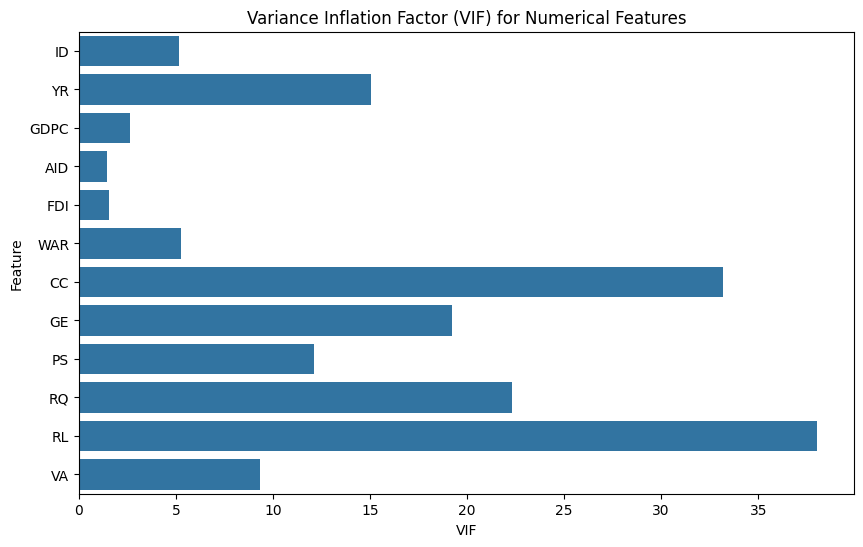

In [6]:
# Describing the data
# Shows highly correlated variables and strong multicollinearity

# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# initial distribution graphs
corruption_df.hist(bins=50, figsize=(20,15))
plt.show()

# distributions of numerical data
numerical_cols = corruption_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
  plt.figure()
  sns.histplot(corruption_df[col].dropna(), kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

# explore relationships between 'GDPC' and other numerical features
plt.figure(figsize=(12,8))
sns.heatmap(corruption_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# AID trend
sns.lineplot(data=corruption_df, x='YR', y='AID')
plt.title('Aid Trend')
plt.xlabel('Year')
plt.ylabel('AID')
plt.legend()
plt.show()

sns.lineplot(data=corruption_df, x='YR', y='CC')
plt.title('Control of Corruption Trend')
plt.xlabel('Year')
plt.ylabel('CC')
plt.legend()
plt.show()

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = corruption_df[numerical_cols].dropna()
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_data)

plt.figure(figsize=(10,6))
sns.barplot(x='VIF', y='Feature', data=vif_data)
plt.title('Variance Inflation Factor (VIF) for Numerical Features')
plt.show()

    GDPC  log_GDPC       AID    log_AID
0  183.0  5.214936  28000000  17.147715
1  170.0  5.141664  28000000  17.147715
2  157.0  5.062595  28000000  17.147715
3  141.0  4.955827  28000000  17.147715
4  180.2  5.199601  28000000  17.147715
Training Data: 286 rows
Validation Data: 176 rows
Test Data: 132 rows
No data leakage detected between train and validation sets.


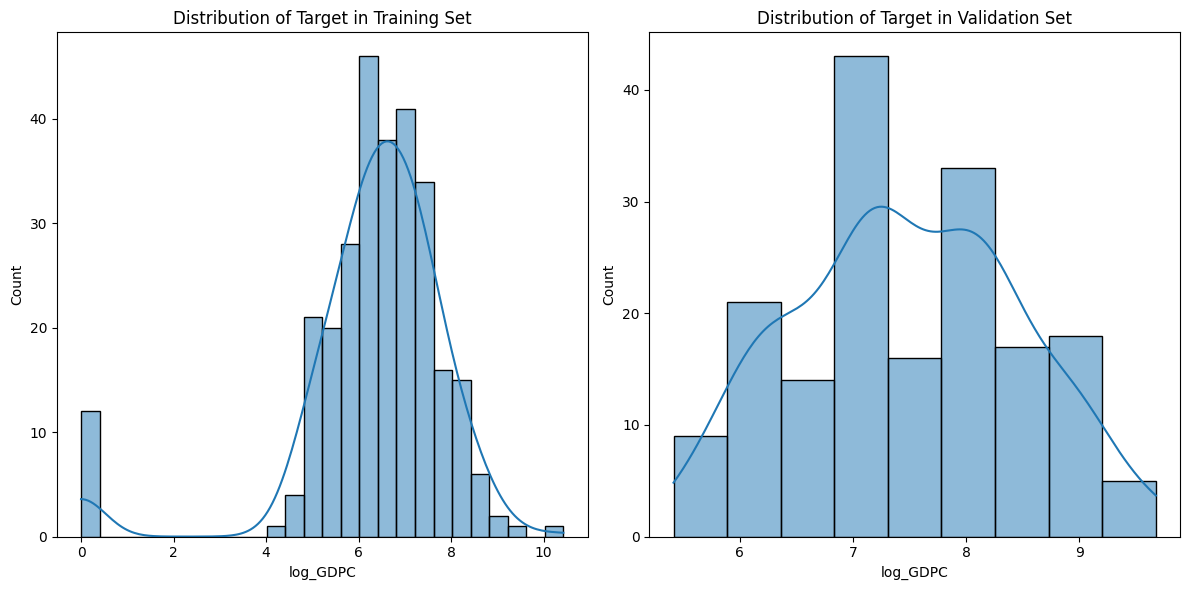

       Country        ID        YR      GDPC       AID       FDI       WAR  \
0  Afghanistan -1.655032 -1.669046 -0.677345 -0.426506 -0.334349  0.680481   
1  Afghanistan -1.655032 -1.540658 -0.682061 -0.426506 -0.334624  0.680481   
2  Afghanistan -1.655032 -1.412270 -0.686776 -0.426506 -0.334439  0.680481   
3  Afghanistan -1.655032 -1.283881 -0.692580 -0.426506 -0.333667  0.680481   
4  Afghanistan -1.655032 -1.155493 -0.678361 -0.426506 -0.334416  0.680481   

         CC        GE        PS        RQ        RL        VA  log_GDPC  \
0 -0.682602 -1.901014 -1.266169 -1.768330 -1.227626 -1.647990 -1.146894   
1 -0.556039 -1.844921 -1.272164 -1.746989 -1.185107 -1.764246 -1.196223   
2 -0.429476 -1.788828 -1.278160 -1.725647 -1.142588 -1.880503 -1.249454   
3 -0.534161 -1.843920 -1.285046 -1.739200 -1.179192 -1.873481 -1.321333   
4 -0.638846 -1.899013 -1.291932 -1.752752 -1.215797 -1.866460 -1.157218   

    log_AID  
0 -0.260934  
1 -0.260934  
2 -0.260934  
3 -0.260934  
4 -0.26093

In [ ]:
# Partitioning the data
# Model had leackage which was fixed with commonindicies
# Added log to GDPC and AID

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize empty DataFrames for train, val, and test
x = corruption_df[['AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']]
y = corruption_df['GDPC']

# Step 1.1: Add logs to GDPC and AID
import numpy as np

  # handle outliers
corruption_df['log_GDPC'] = np.log1p(corruption_df['GDPC'])
corruption_df['log_AID'] = np.log1p(corruption_df['AID'])

  # verify the transformation
print(corruption_df[['GDPC', 'log_GDPC', 'AID', 'log_AID']].head())

# Update target (y) and features (X)
y = corruption_df['log_GDPC']
x = corruption_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']]

# Proceed with data partitioning and modeling as before
train_df = pd.DataFrame()
val_df = pd.DataFrame()
test_df = pd.DataFrame()

# Step 2: group by country id and perform the split for each group
for ID, group in corruption_df.groupby('ID'):
    # sort the group by Year
    group = group.sort_values(by='YR')

    # calculate the split indices for each group
    total_rows = len(group)
    train_end = int(total_rows * 0.5)  # 50% for training
    val_end = train_end + int(total_rows * 0.3)  # Next 30% for validation

    # create the splits for this country
    train_df = pd.concat([train_df, group.iloc[:train_end]])
    val_df = pd.concat([val_df, group.iloc[train_end:val_end]])
    test_df = pd.concat([test_df, group.iloc[val_end:]])

# output the sizes of each dataset to verify
print(f"Training Data: {len(train_df)} rows")
print(f"Validation Data: {len(val_df)} rows")
print(f"Test Data: {len(test_df)} rows")

# ** Data Leakage Check **
# check for any data leakage
common_indices = set(train_df.index) & set(val_df.index)
if common_indices:
    print("Warning: There are common indices in train and validation sets!")
else:
    print("No data leakage detected between train and validation sets.")

# visualize the distribution of the target variable in both sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['log_GDPC'], kde=True)
plt.title("Distribution of Target in Training Set")
plt.xlabel('log_GDPC')

plt.subplot(1, 2, 2)
sns.histplot(val_df['log_GDPC'], kde=True)
plt.title("Distribution of Target in Validation Set")
plt.xlabel('log_GDPC')

plt.tight_layout()
plt.show()

# Step 3: data normalization
from sklearn.preprocessing import StandardScaler
norm_df = corruption_df.copy()

numeric_cols = corruption_df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
norm_df[numeric_cols] = scaler.fit_transform(corruption_df[numeric_cols])

print(norm_df.head())

# fit the scaler only on the training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(train_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']])

# transform validation and test sets using the same scaler
x_val_scaled = scaler.transform(val_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']])
x_test_scaled = scaler.transform(test_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']])

In [ ]:
# Fitting for outliers
# Removing outliers

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# check for outliers
numeric_columns = corruption_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# create subplots, one for each numeric column
fig = make_subplots(rows=1, cols=len(numeric_columns),
                    subplot_titles=numeric_columns)

# add box plots for each numeric column
for i, col in enumerate(numeric_columns):
    fig.add_trace(
        go.Box(y=corruption_df[col], name=col),
        row=1, col=i+1
    )

# update layout
fig.update_layout(
    title_text="Boxplots to Check for Outliers",
    height=600,
    width=200 * len(numeric_columns),  # Adjust width based on number of plots
    showlegend=False
)

# Update x-axis
fig.update_xaxes(visible=False)  # Hide x-axis labels as they're not needed for boxplots

# Show plot
fig.show()

#outlier stats
def remove_outliers(df, columns):
    df_clean = df.copy()
    total_removed = 0
    total_data = len(df) * len(columns)

# print summary statistics for each numeric column
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        df_clean = df_clean[~df_clean.index.isin(outliers.index)]

        num_removed = len(outliers)
        total_removed += num_removed

        print(f"Column {column}:")
        print(f"  Number of outliers removed: {num_removed}")
        print(f"  Percentage of data removed: {(num_removed / len(df)) * 100:.2f}%")
        print("--------------------")

    overall_percentage = (total_removed / total_data) * 100
    print(f"\nOverall percentage of data points removed: {overall_percentage:.2f}%")
    print(f"Number of rows in original dataset: {len(df)}")
    print(f"Number of rows in cleaned dataset: {len(df_clean)}")

    return df_clean

# specify the numeric columns for outlier removal
numeric_columns = ['log_GDPC', 'log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']

# display original DataFrame shape
print("Original dataset shape:", corruption_df.shape)

# remove outliers - be careful with this one!!!
data_df_clean = remove_outliers(corruption_df, numeric_columns)

# display cleaned DataFrame shape
print("Cleaned dataset shape:", data_df_clean.shape)

Original dataset shape: (594, 15)
Column log_GDPC:
  Number of outliers removed: 14
  Percentage of data removed: 2.36%
--------------------
Column log_AID:
  Number of outliers removed: 32
  Percentage of data removed: 5.39%
--------------------
Column FDI:
  Number of outliers removed: 76
  Percentage of data removed: 12.79%
--------------------
Column WAR:
  Number of outliers removed: 0
  Percentage of data removed: 0.00%
--------------------
Column CC:
  Number of outliers removed: 12
  Percentage of data removed: 2.02%
--------------------
Column GE:
  Number of outliers removed: 0
  Percentage of data removed: 0.00%
--------------------
Column PS:
  Number of outliers removed: 0
  Percentage of data removed: 0.00%
--------------------
Column RQ:
  Number of outliers removed: 0
  Percentage of data removed: 0.00%
--------------------
Column RL:
  Number of outliers removed: 0
  Percentage of data removed: 0.00%
--------------------
Column VA:
  Number of outliers removed: 0
  Per

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.48508e-22): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.29459e-22): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.93727e-22): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.97223e-21): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.22e-22): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.49201e-22): result may not be accurate.

/usr/local/li

Validation MSE: 1.27
Validation RMSE: 1.13
Validation R-squared: -0.3135

Coefficients:
   Feature   Coefficient
0  log_AID  1.346371e-01
1      FDI  5.830725e-11
2      WAR -4.726335e-02
3       CC -1.637095e-02
4       GE  7.714536e-03
5       PS  3.073223e-02
6       RQ  1.230529e-02
7       RL  2.039506e-02
8       VA -2.712039e-02


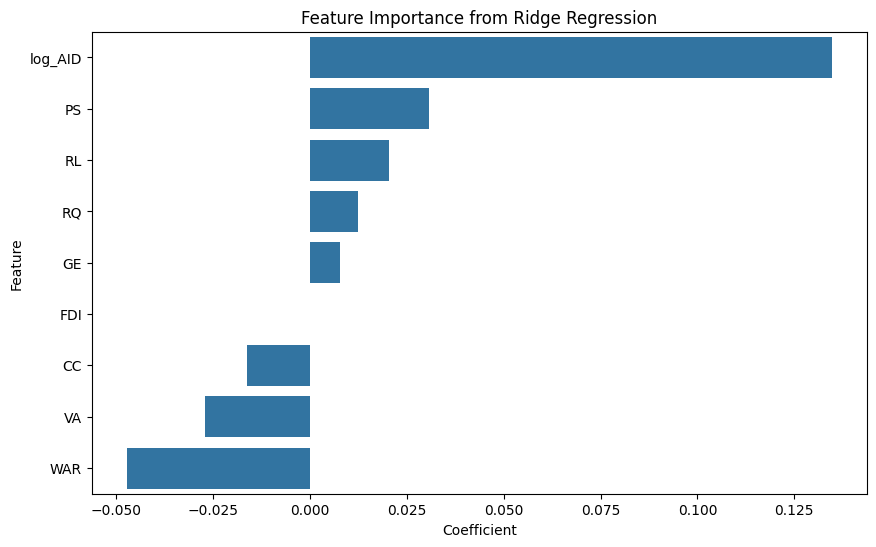

  Feature        VIF
0     AID   1.317112
1     FDI   1.294214
2     WAR   4.267941
3      CC  22.598735
4      GE  18.546254
5      PS  11.872955
6      RQ  20.858399
7      RL  35.356719
8      VA   8.220024


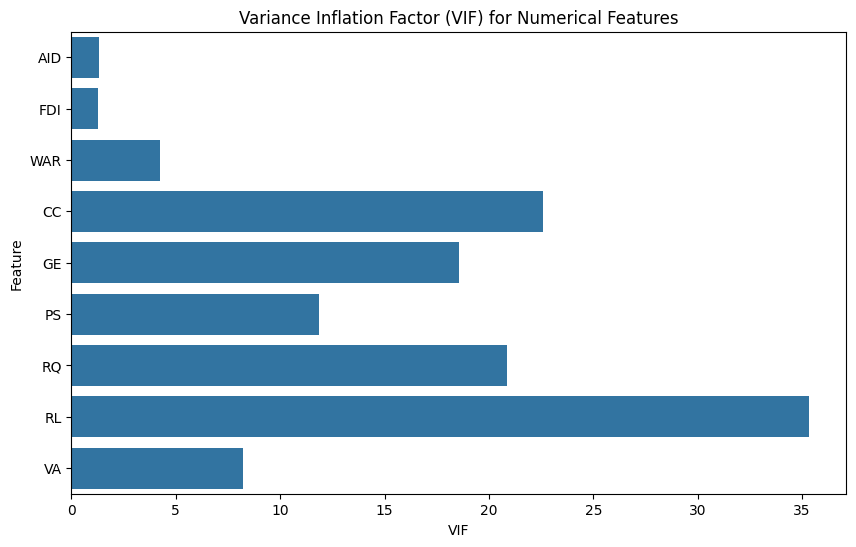

In [ ]:
# Ridge Regression after Lasso Regression failed to remove multicollinearity

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Fit the Ridge model
ridge_model = RidgeCV(alphas=np.logspace(-3, 3, 7), cv=5)
ridge_model.fit(x_train, y_train)

# Make predictions
train_pred = ridge_model.predict(x_train)
valid_pred = ridge_model.predict(x_valid)

# Calculate performance metrics
mse = mean_squared_error(y_valid, valid_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, valid_pred)

print(f"Validation MSE: {mse:.2f}")
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R-squared: {r2:.4f}")

# Analyze coefficients
coef_df = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': ridge_model.coef_})
print("\nCoefficients:")
print(coef_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.sort_values(by='Coefficient', ascending=False))
plt.title("Feature Importance from Ridge Regression")
plt.show()

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = corruption_df[numerical_cols].dropna()
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

plt.figure(figsize=(10,6))
sns.barplot(x='VIF', y='Feature', data=vif_data)
plt.title('Variance Inflation Factor (VIF) for Numerical Features')
plt.show()

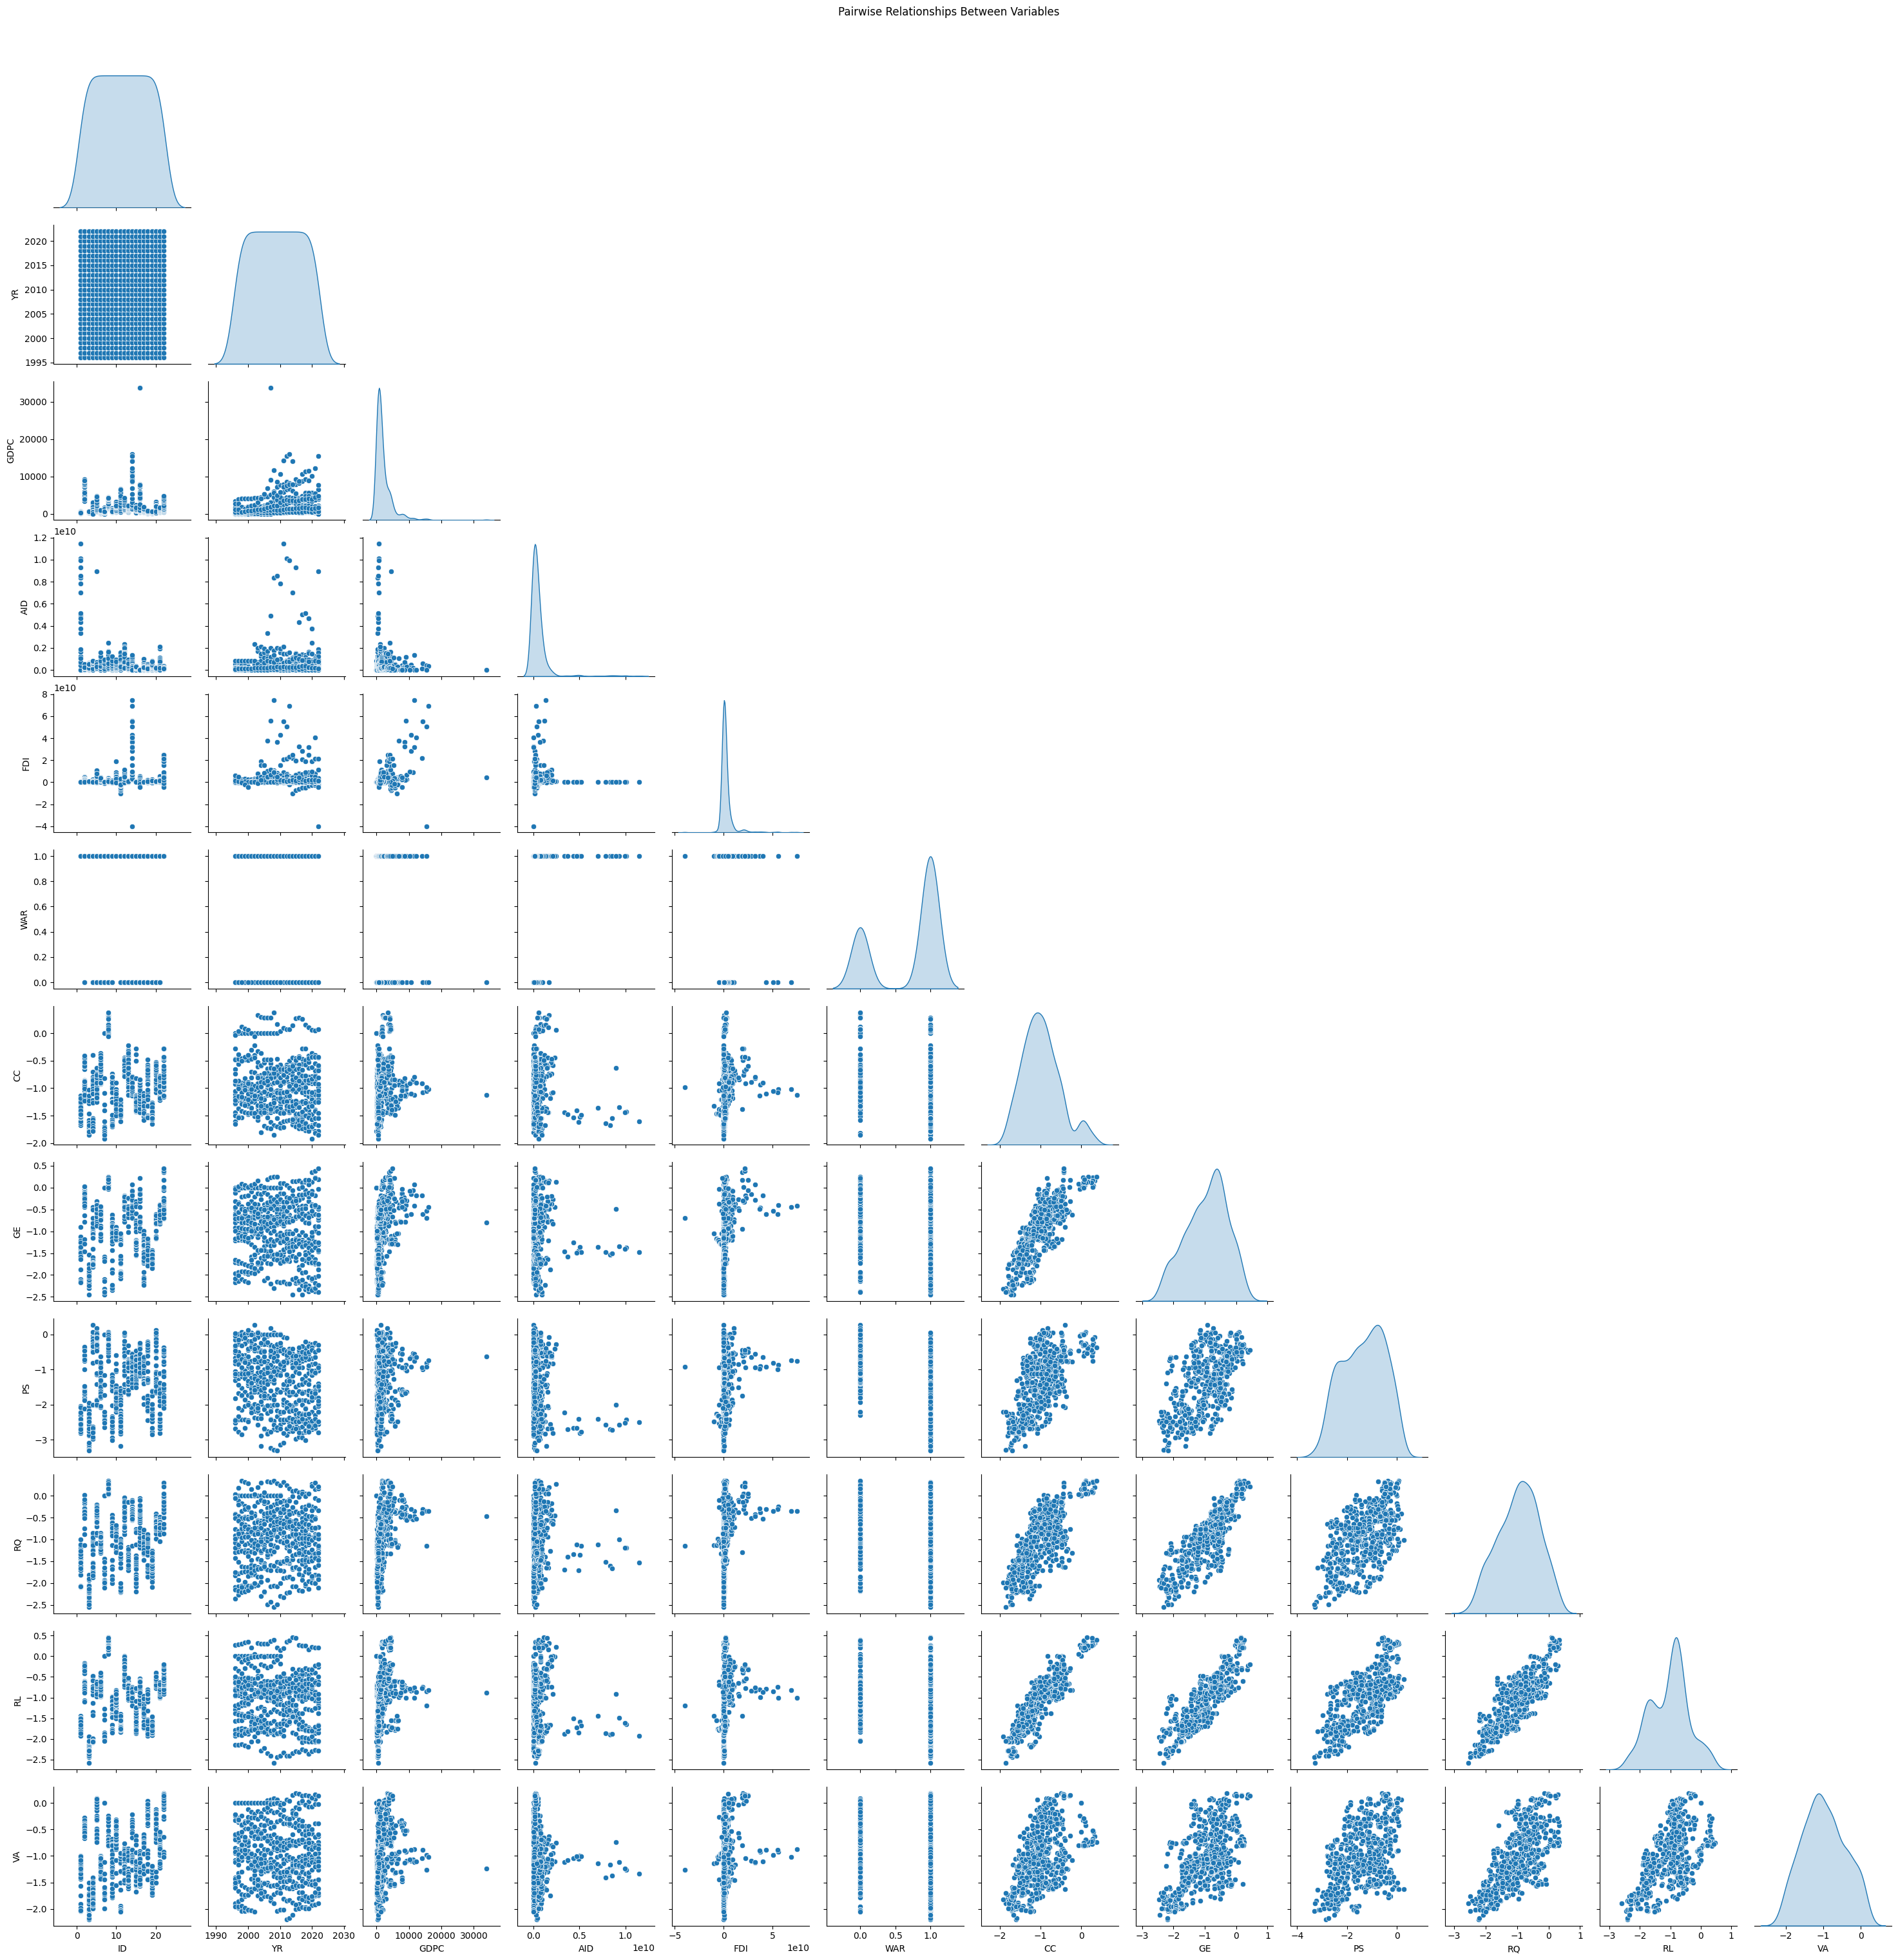

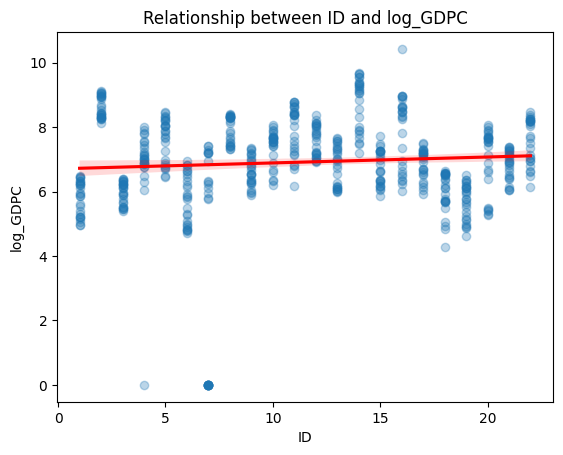

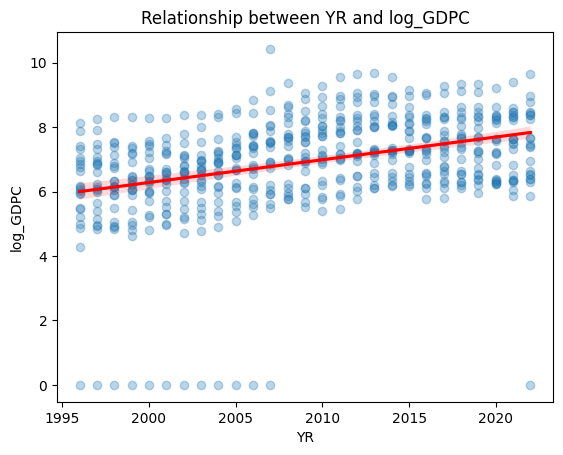

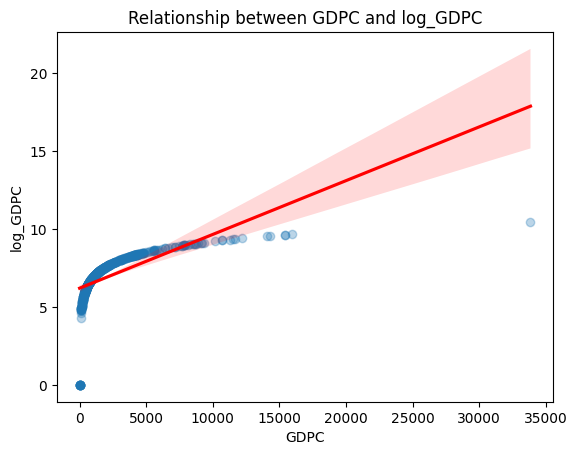

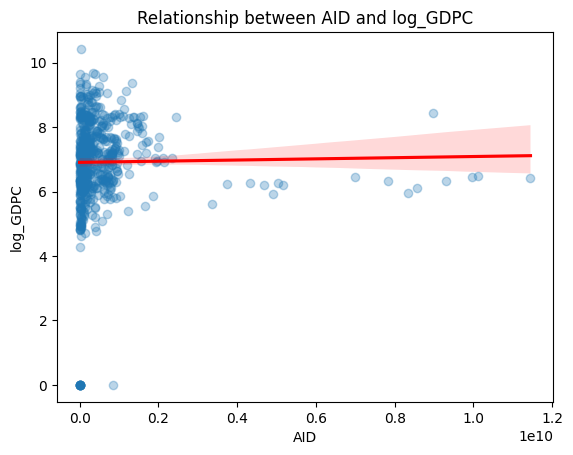

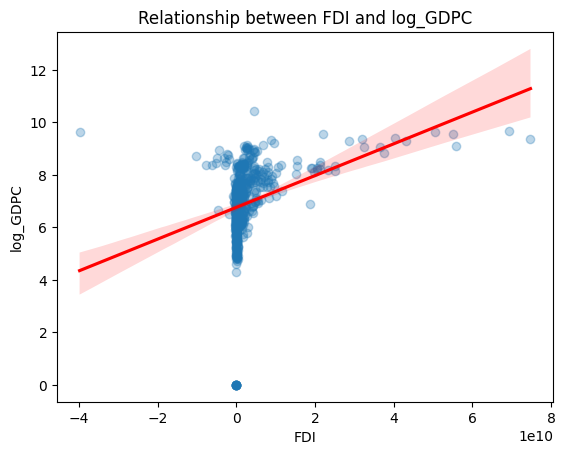

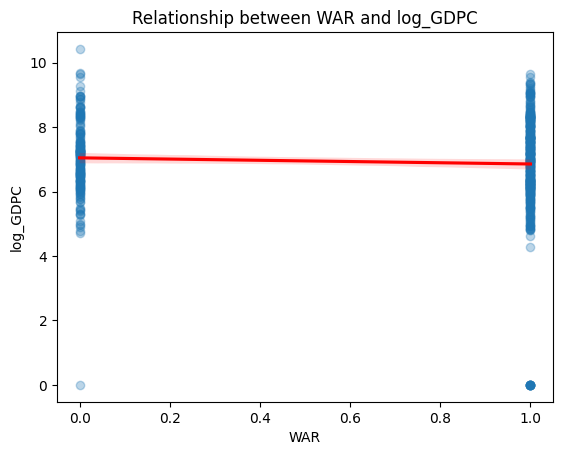

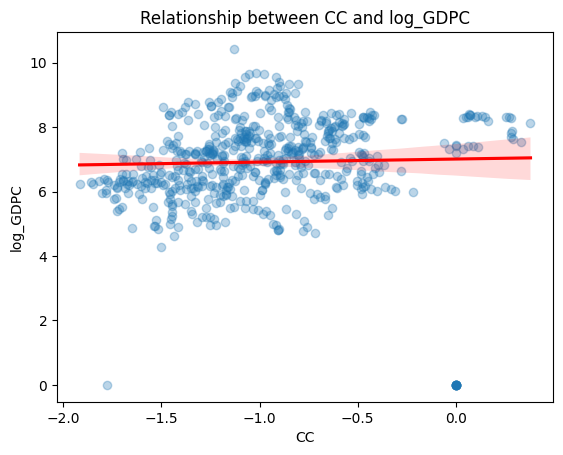

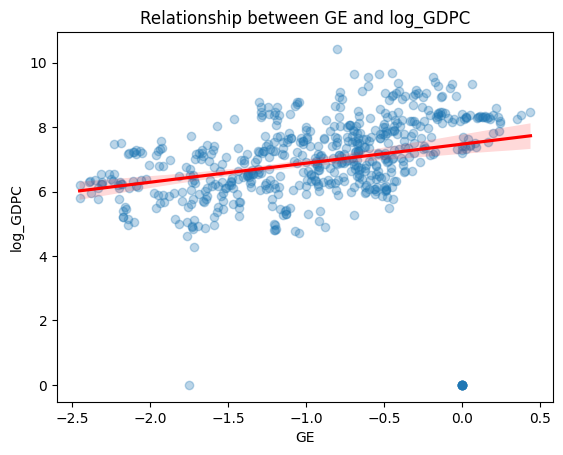

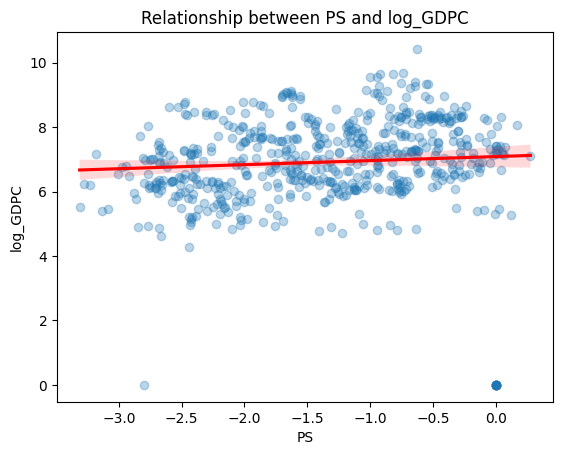

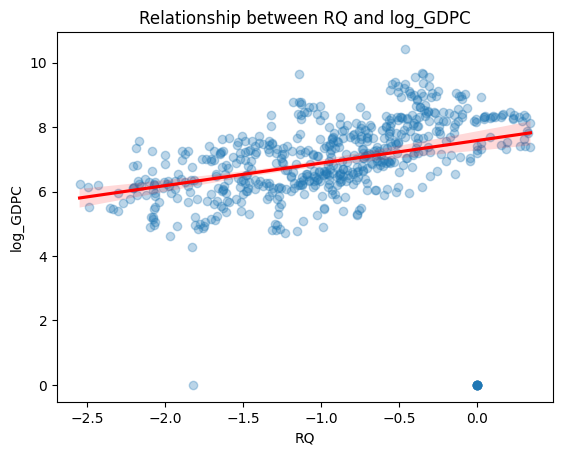

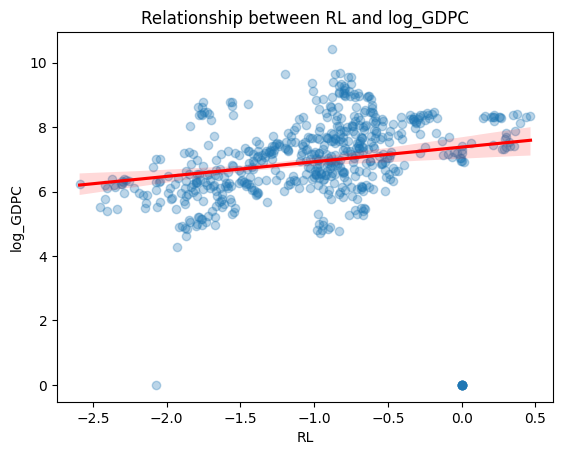

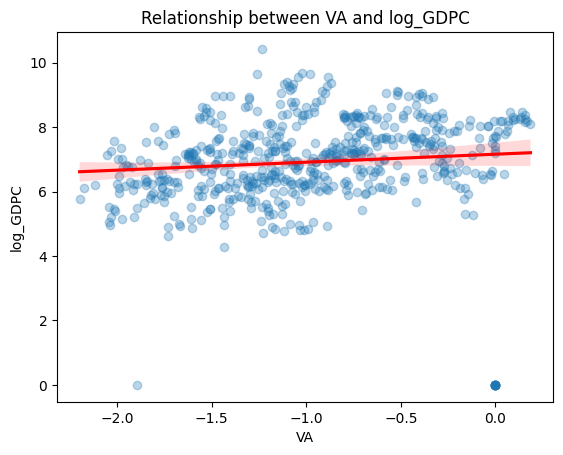

In [ ]:
# Revisualized data after normalization

# pairplot to visualize pairwise relationships
sns.pairplot(corruption_df[numerical_cols], diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.show()

# scatter plots with regression lines for GDPC and other numerical features
for col in numerical_cols:
    if col != 'log_GDPC':
        plt.figure()
        sns.regplot(x=corruption_df[col], y=corruption_df['log_GDPC'], line_kws={"color":"red"}, scatter_kws={"alpha":0.3})
        plt.title(f'Relationship between {col} and log_GDPC')
        plt.show()

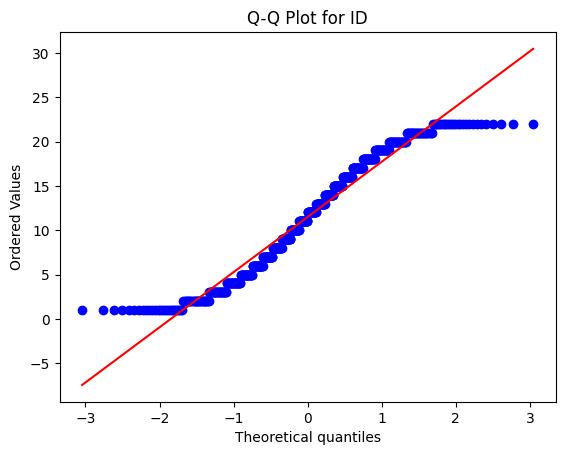

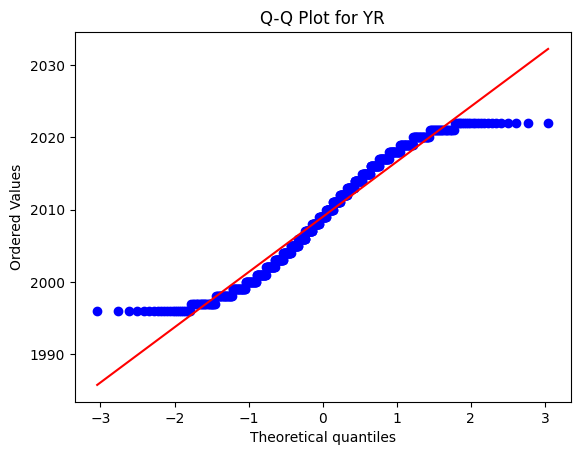

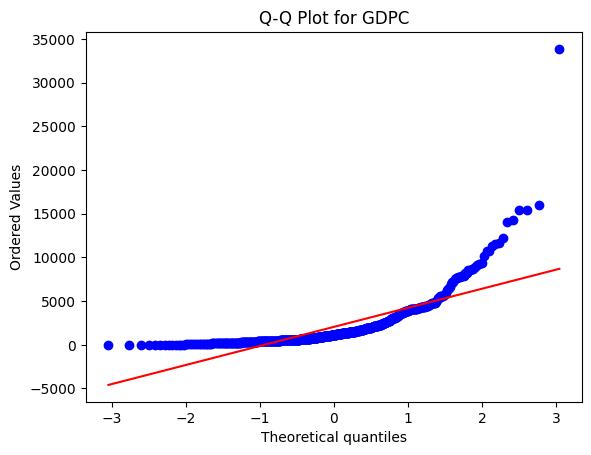

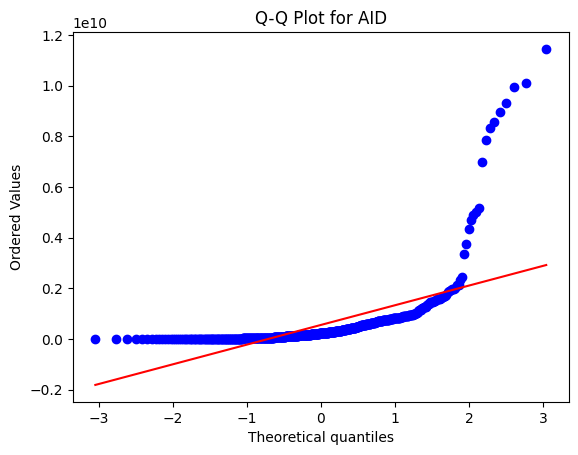

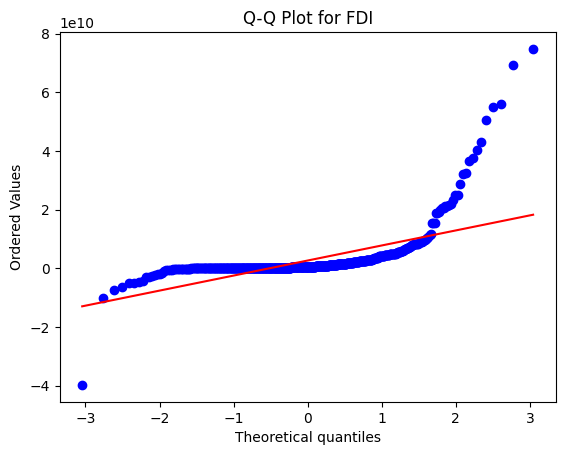

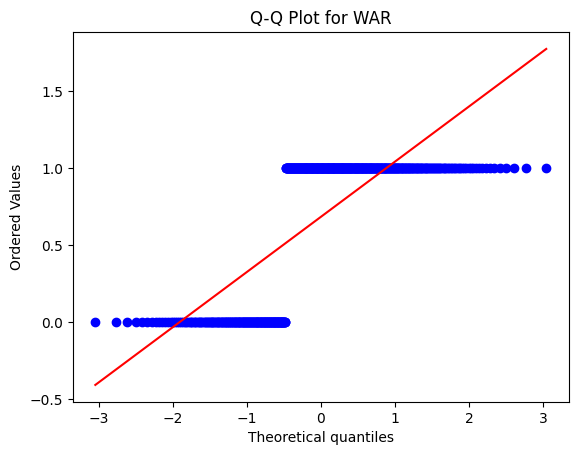

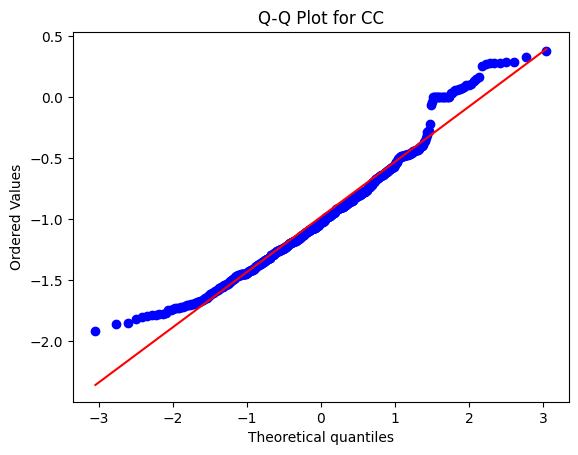

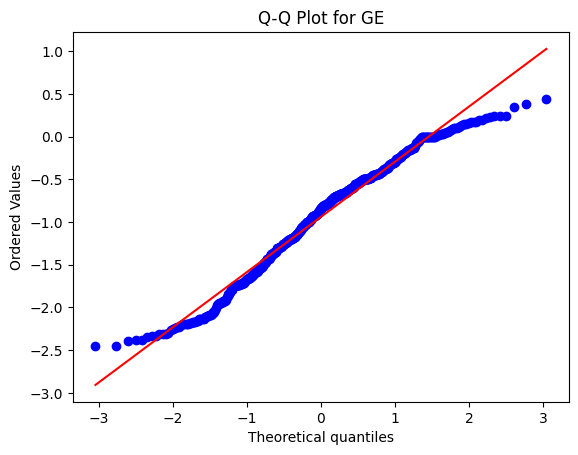

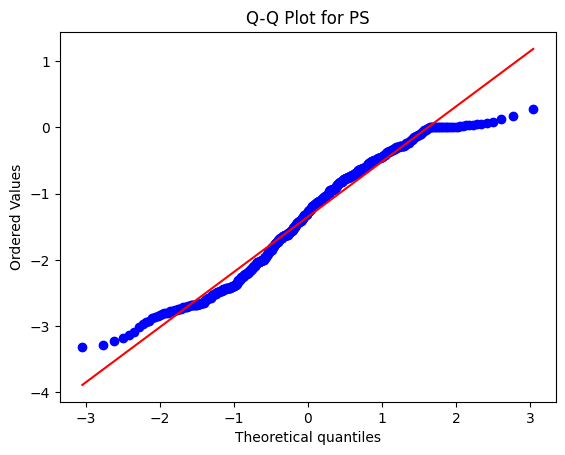

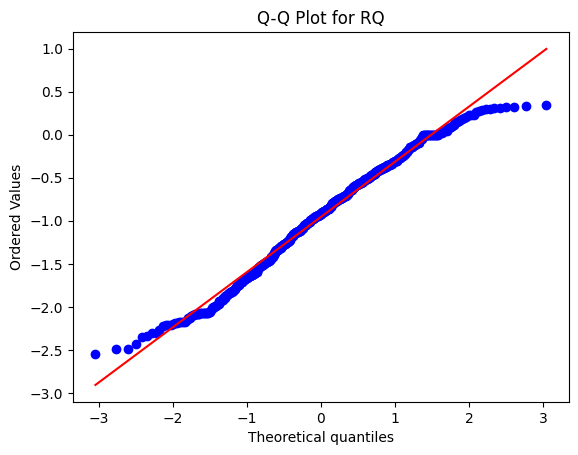

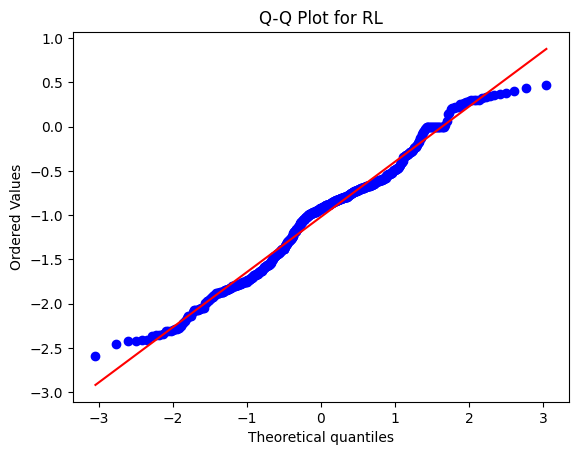

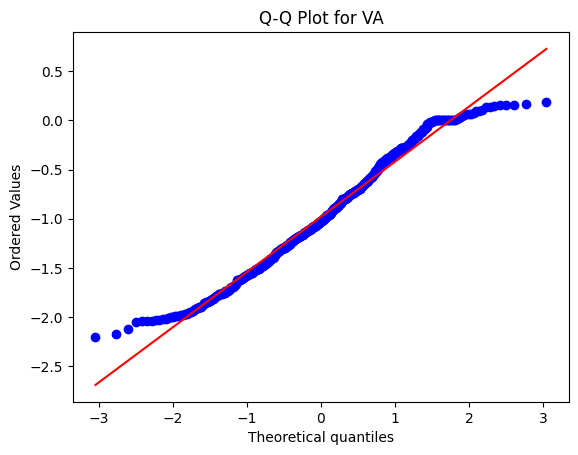

In [ ]:
# Q-Q Plot to check normality

import scipy.stats as stats
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure()
    stats.probplot(corruption_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.show()

Sample of training predictions:
       Country  Year    Actual  Predicted  Residual
0  Afghanistan  1996  5.214936   5.766119 -0.551183
1  Afghanistan  1997  5.141664   5.771170 -0.629506
2  Afghanistan  1998  5.062595   5.776398 -0.713803
3  Afghanistan  1999  4.955827   5.814206 -0.858379
4  Afghanistan  2000  5.199601   5.851429 -0.651827

Sample of validation predictions:
        Country  Year    Actual  Predicted  Residual
13  Afghanistan  2009  6.118978   7.005234 -0.886256
14  Afghanistan  2010  6.334167   7.251406 -0.917239
15  Afghanistan  2011  6.412967   7.096559 -0.683592
16  Afghanistan  2012  6.483719   7.097041 -0.613322
17  Afghanistan  2013  6.460999   7.126460 -0.665461


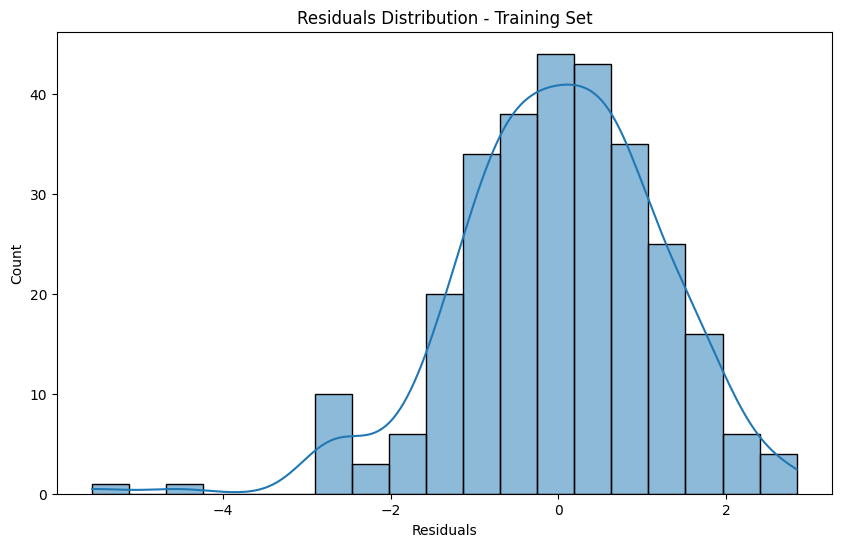

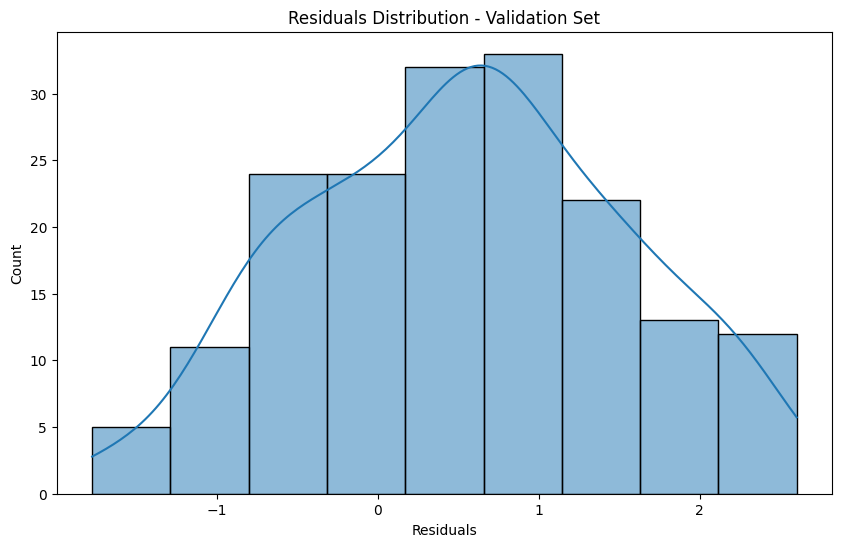

In [ ]:
# Fit Model and Make Predictions
# Try 1 residuals were extremely high
# Try 2 used logged variables, ressiduals were better
# Try 3 multicollinearity still present

# import necessary libraries
from sklearn.linear_model import LinearRegression
import pandas as pd

# define feature (X) and target (y) variables
x_train = train_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']]
y_train = train_df['log_GDPC']

x_valid = val_df[['log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']]
y_valid = val_df['log_GDPC']

# initialize and fit the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# make predictions on training and validation sets
train_pred = model.predict(x_train)
valid_pred = model.predict(x_valid)

# create DataFrames with actual and predicted values, and calculate residuals
train_results = pd.DataFrame({
    'Country': train_df['Country'],  # Include country for panel data clarity
    'Year': train_df['YR'],
    'Actual': y_train,
    'Predicted': train_pred
})
train_results['Residual'] = train_results['Actual'] - train_results['Predicted']

valid_results = pd.DataFrame({
    'Country': val_df['Country'],  # Include country for panel data clarity
    'Year': val_df['YR'],
    'Actual': y_valid,
    'Predicted': valid_pred
})
valid_results['Residual'] = valid_results['Actual'] - valid_results['Predicted']

# display sample of predictions
print("Sample of training predictions:")
print(train_results.head())

print("\nSample of validation predictions:")
print(valid_results.head())

# analyze residuals to check the model's performance on training and validation sets
import seaborn as sns
import matplotlib.pyplot as plt

# plot the residuals for training data
plt.figure(figsize=(10, 6))
sns.histplot(train_results['Residual'], kde=True)
plt.title("Residuals Distribution - Training Set")
plt.xlabel("Residuals")
plt.show()

# plot the residuals for validation data
plt.figure(figsize=(10, 6))
sns.histplot(valid_results['Residual'], kde=True)
plt.title("Residuals Distribution - Validation Set")
plt.xlabel("Residuals")
plt.show()


Training set metrics:
Mean Squared Error: 1.46
Root Mean Squared Error: 1.21
R-squared Score: 0.4686

Validation set metrics:
Mean Squared Error: 1.26
Root Mean Squared Error: 1.12
R-squared Score: -0.3037


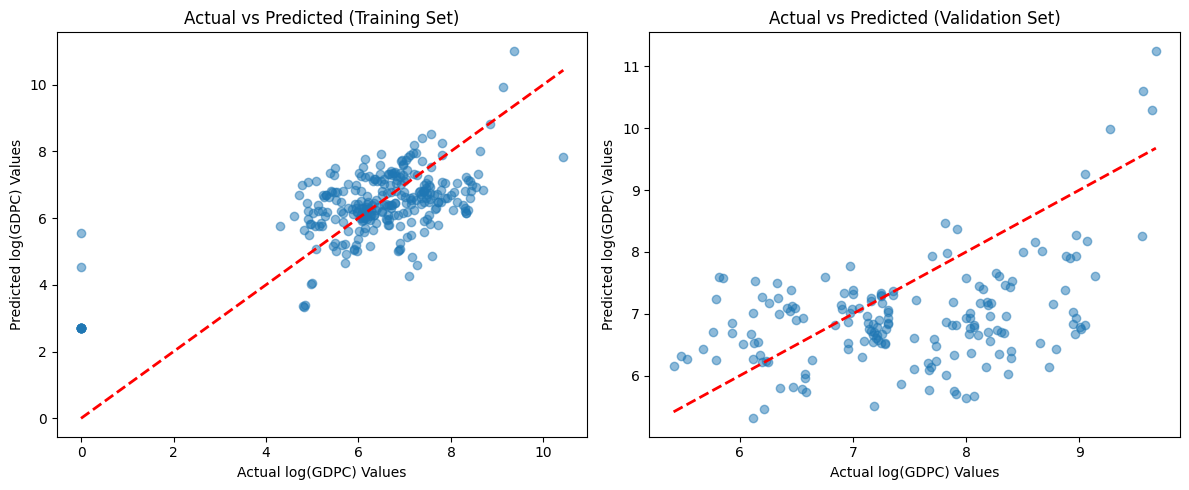

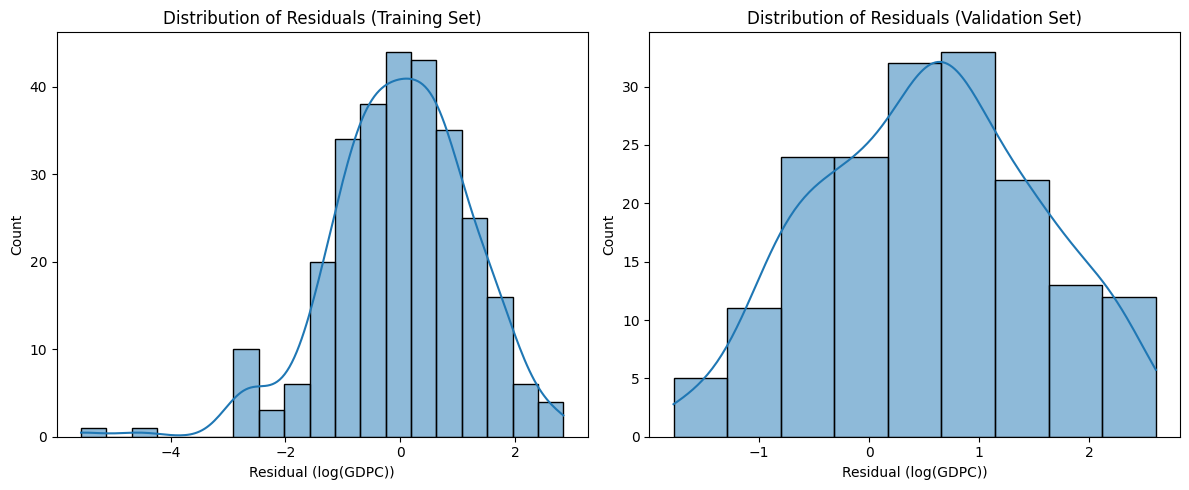


Top 10 most important features:
  Feature   Coefficient
3      CC -1.911168e+00
7      RL  1.108265e+00
8      VA -9.288874e-01
4      GE  6.625513e-01
2     WAR -5.959722e-01
0     AID  1.492671e-01
6      RQ  1.108200e-01
5      PS  3.559029e-02
1     FDI  4.907202e-11


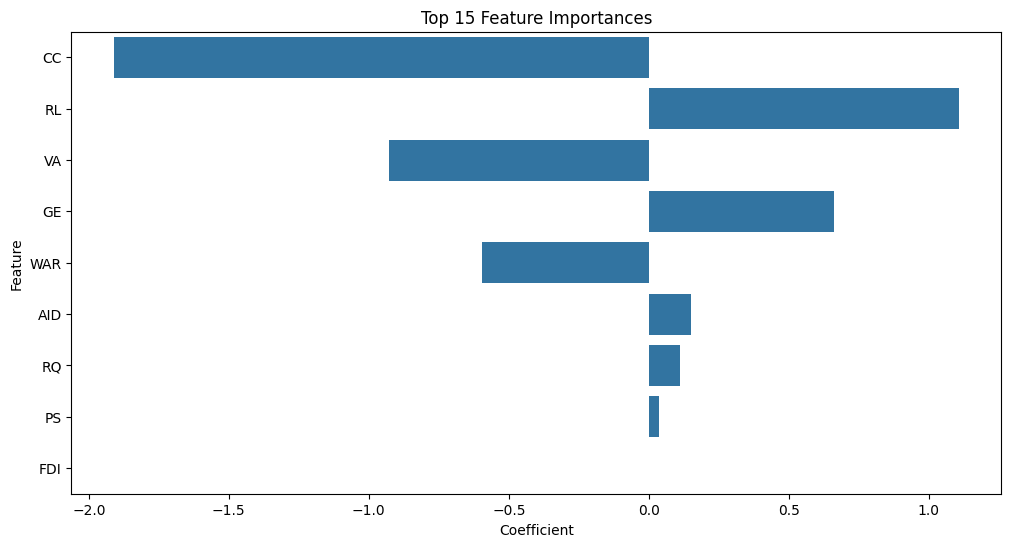

In [ ]:
# Performance metrics

# calculate and display performance metrics
def print_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} set metrics:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared Score: {r2:.4f}")

print_metrics(train_df['log_GDPC'], train_pred, "Training")
print_metrics(val_df['log_GDPC'], valid_pred, "Validation")

# Visualize actual vs predicted values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(train_df['log_GDPC'], train_pred, alpha=0.5)
plt.plot([train_df['log_GDPC'].min(), train_df['log_GDPC'].max()], [train_df['log_GDPC'].min(), train_df['log_GDPC'].max()], 'r--', lw=2)
plt.xlabel("Actual log(GDPC) Values")
plt.ylabel("Predicted log(GDPC) Values")
plt.title("Actual vs Predicted (Training Set)")

plt.subplot(1, 2, 2)
plt.scatter(val_df['log_GDPC'], valid_pred, alpha=0.5)
plt.plot([val_df['log_GDPC'].min(), val_df['log_GDPC'].max()], [val_df['log_GDPC'].min(), val_df['log_GDPC'].max()], 'r--', lw=2)
plt.xlabel("Actual log(GDPC) Values")
plt.ylabel("Predicted log(GDPC) Values")
plt.title("Actual vs Predicted (Validation Set)")

plt.tight_layout()
plt.show()

# Visualize residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_residuals = train_df['log_GDPC'] - train_pred
sns.histplot(train_residuals, kde=True)
plt.title("Distribution of Residuals (Training Set)")
plt.xlabel("Residual (log(GDPC))")

plt.subplot(1, 2, 2)
valid_residuals = val_df['log_GDPC'] - valid_pred
sns.histplot(valid_residuals, kde=True)
plt.title("Distribution of Residuals (Validation Set)")
plt.xlabel("Residual (log(GDPC))")

plt.tight_layout()
plt.show()

# Display feature importance
feature_importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(15))
plt.title("Top 15 Feature Importances")
plt.show()

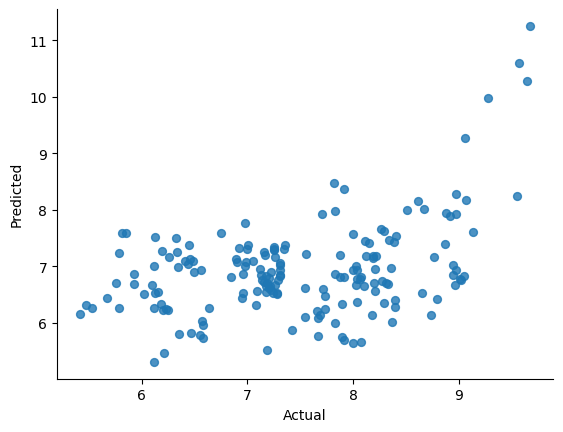

In [ ]:
# Scoring the validation data
valid_pred = model.predict(x_valid)
valid_results = pd.DataFrame({
    'Actual': y_valid,
    'Predicted': valid_pred,
    'Residual': y_valid - valid_pred})
valid_results.head()

# Actual vs Predicted

from matplotlib import pyplot as plt
valid_results.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Access the accuracy & regression statistics

# training set
regressionSummary(train_results.Actual, train_results.Predicted)

# validation set
regressionSummary(valid_results.Actual, valid_results.Predicted)


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 1.2071
     Mean Absolute Error (MAE) : 0.9366

Regression statistics

                      Mean Error (ME) : 0.5388
       Root Mean Squared Error (RMSE) : 1.1231
            Mean Absolute Error (MAE) : 0.9238
          Mean Percentage Error (MPE) : 6.1233
Mean Absolute Percentage Error (MAPE) : 12.0678


In [ ]:
# Predicting new data :D

import pandas as pd

new_data = pd.DataFrame({
    'log_AID': [500, 1000],
    'FDI': [200, 300],
    'WAR': [0, 1],
    'CC': [0.5, 0.7],
    'GE': [0.3, 0.6],
    'PS': [0.4, 0.5],
    'RQ': [0.6, 0.8],
    'RL': [0.2, 0.4],
    'VA': [0.5, 0.6]
})

print("New data for prediction:")
print(new_data)

predictions = model.predict(new_data)

print('Predictions: ', predictions)


New data for prediction:
   log_AID  FDI  WAR   CC   GE   PS   RQ   RL   VA
0      500  200    0  0.5  0.3  0.4  0.6  0.2  0.5
1     1000  300    1  0.7  0.6  0.5  0.8  0.4  0.6
Predictions:  [ 77.01623232 151.02481126]


In [ ]:
# Investigate new data, tbd

## **Trial 2**
I used PCA to fix existing multicollinearity, while leaving 'CC' excluded. It was able to fix the multicollinearity but PCA1 and PCA2 make it hard to explain what these "new variables" actually mean for the explanation. On another note, autocorrelation is now violating OLS assumptions. Tried OLS, OLS with lagged log_GDPC, OLS with outliers removes, and then GLS; none were able to account for non-normality. Model was otherwise very significant and adequate. Will try a non-linear model next for flexibility.

In [75]:
# import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load the dataset
corruption_df = pd.read_csv('/content/drive/MyDrive/MS Data Analytics/FALL SEMESTER/MSA550/PROJECT/Corruption Data.csv')
x = corruption_df.drop(columns=['Country', 'GDPC'])
y = corruption_df['GDPC']
print(corruption_df.head(10))

# review the data types after cleaning
print(data.dtypes)

       Country  ID    YR   GDPC         AID        FDI  WAR       CC       GE  \
0  Afghanistan   1  1996  183.0    28000000     690000    1 -1.29170 -2.17520   
1  Afghanistan   1  1997  170.0    28000000   -1460000    1 -1.23385 -2.13875   
2  Afghanistan   1  1998  157.0    28000000     -10000    1 -1.17600 -2.10230   
3  Afghanistan   1  1999  141.0    28000000    6040000    1 -1.22385 -2.13810   
4  Afghanistan   1  2000  180.2    28000000     170000    1 -1.27170 -2.17390   
5  Afghanistan   1  2001  142.9    28228258     680000    1 -1.25110 -1.58770   
6  Afghanistan   1  2002  182.2   400296708   50000000    1 -1.25114 -1.58769   
7  Afghanistan   1  2003  199.6   703345175   57800000    1 -1.34418 -1.12742   
8  Afghanistan   1  2004  221.8  1240018130  186900000    1 -1.35065 -0.90989   
9  Afghanistan   1  2005  254.1  1661363692  271000000    1 -1.44725 -1.21724   

        PS       RQ       RL       VA  
0 -2.41730 -2.09030 -1.78810 -1.90850  
1 -2.42235 -2.07660 -1.76150

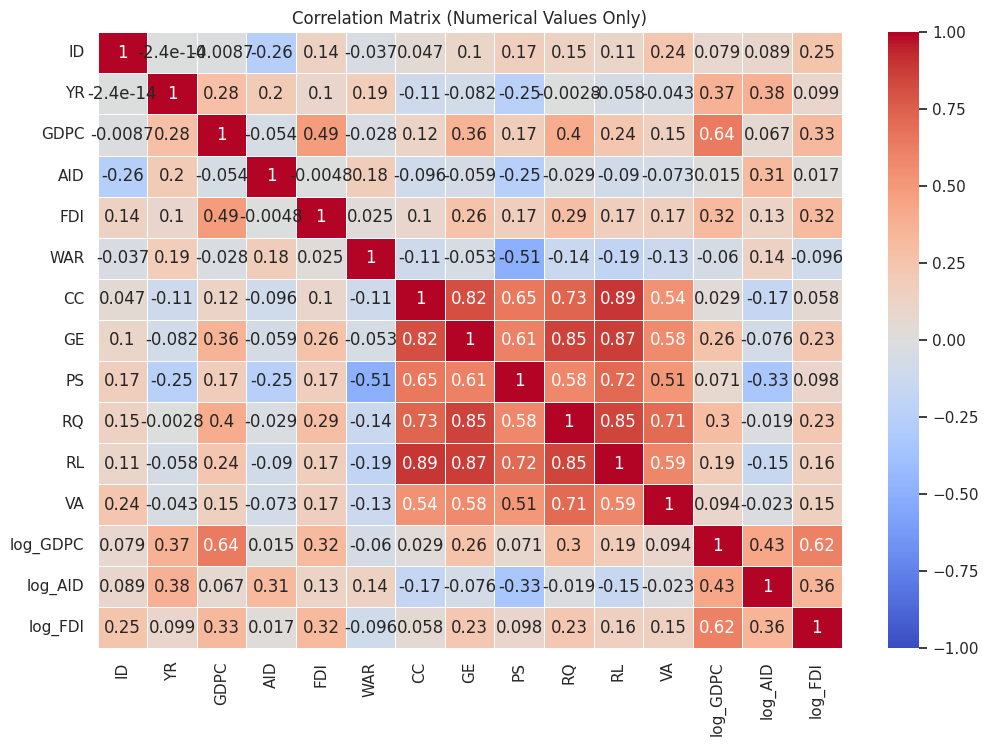

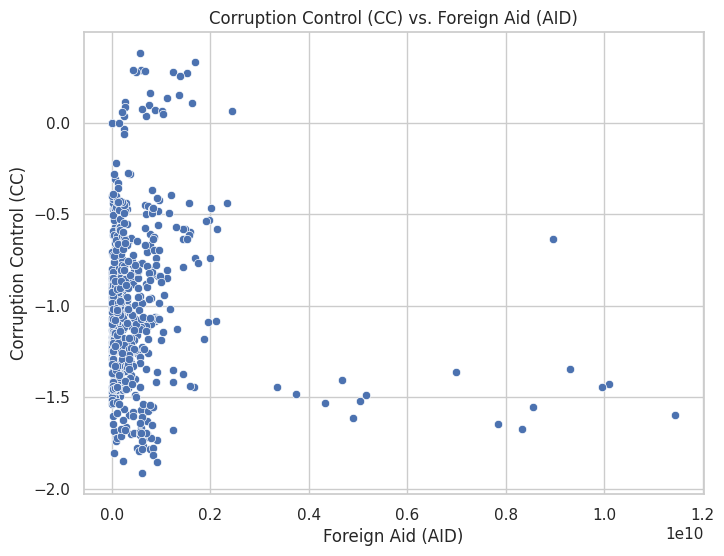

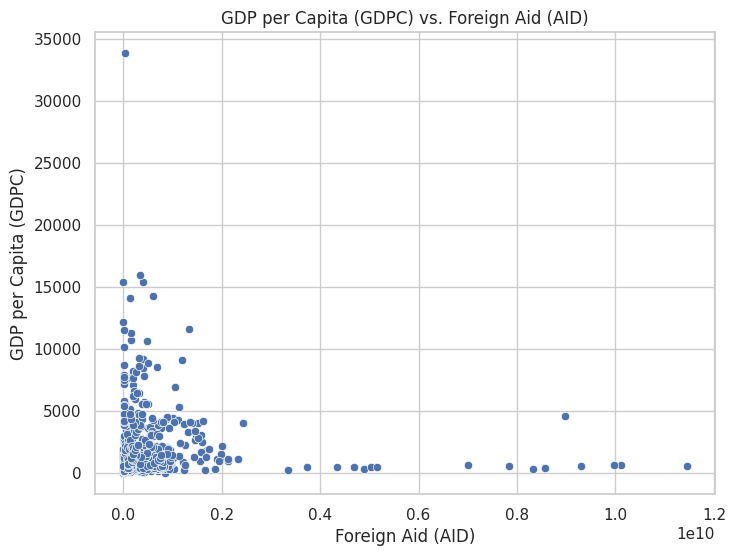

    GDPC  log_GDPC       AID    log_AID    log_FDI      FDI
0  183.0  5.214936  28000000  17.147715  13.444448   690000
1  170.0  5.141664  28000000  17.147715        NaN -1460000
2  157.0  5.062595  28000000  17.147715        NaN   -10000
3  141.0  4.955827  28000000  17.147715  15.613915  6040000
4  180.2  5.199601  28000000  17.147715  12.043560   170000
Variance Inflation Factor (VIF) Analysis:
   Feature        VIF
0  log_AID   1.429921
1  log_FDI   1.338642
2      WAR   1.662500
3       CC   5.828479
4       GE   6.054780
5       PS   3.429312
6       RQ   6.313308
7       RL  11.136975
8       VA   2.142983


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



In [77]:
# descriptive statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# set the plot style for all plots
sns.set(style="whitegrid")

# visualize the Correlation Matrix
# Step 1: Filter the DataFrame to include only numeric columns
numeric_data = corruption_df.select_dtypes(include=[np.number])

# Step 2: Visualizing the Correlation Matrix for numeric columns only
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix (Numerical Values Only)')
plt.show()

# scatter plot (Corruption Control vs. Foreign Aid)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AID', y='CC', data=data)
plt.title('Corruption Control (CC) vs. Foreign Aid (AID)')
plt.xlabel('Foreign Aid (AID)')
plt.ylabel('Corruption Control (CC)')
plt.show()

# scatter plot (GDP per Capita vs. Foreign Aid)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AID', y='GDPC', data=data)
plt.title('GDP per Capita (GDPC) vs. Foreign Aid (AID)')
plt.xlabel('Foreign Aid (AID)')
plt.ylabel('GDP per Capita (GDPC)')
plt.show()

# add logs to GDPC and AID
import numpy as np

corruption_df['log_GDPC'] = np.log1p(corruption_df['GDPC'])
corruption_df['log_AID'] = np.log1p(corruption_df['AID'])
corruption_df['log_FDI'] = np.log1p(corruption_df['FDI'])

  # verify the transformation
print(corruption_df[['GDPC', 'log_GDPC', 'AID', 'log_AID', 'log_FDI', 'FDI']].head())

# Update target (y) and features (X)
y = corruption_df['log_GDPC']
x = corruption_df[['log_AID', 'log_FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']]

# Variance Inflation Factor (VIF) Analysis for Multicollinearity
# preparing the data for VIF analysis (excluding variables 'Country' and 'ID')
X_vif = corruption_df[['log_AID', 'log_FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']].dropna()  # Dropping any rows with missing values for VIF
X_vif_scaled = StandardScaler().fit_transform(X_vif)  # Standardizing the variables for VIF

# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_scaled, i) for i in range(X_vif_scaled.shape[1])]

print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data)

In [78]:
# step 1: standardizing the institutional quality indicators (excluding 'CC')
institutional_quality_exclude_cc = ['GE', 'PS', 'RQ', 'RL', 'VA']
X_exclude_cc = corruption_df[institutional_quality_exclude_cc]

# standardizing the data
scaler = StandardScaler()
X_scaled_exclude_cc = scaler.fit_transform(X_exclude_cc)

In [79]:
# step 2: applying PCA on the selected columns (excluding 'CC')
pca_exclude_cc = PCA()
X_pca_exclude_cc = pca_exclude_cc.fit_transform(X_scaled_exclude_cc)

In [80]:
# step 3: analyzing the explained variance ratio for each principal component
explained_variance_exclude_cc = pca_exclude_cc.explained_variance_ratio_

# display the explained variance ratio
print("Explained Variance for each Principal Component (Excluding 'CC'):")
for i, var in enumerate(explained_variance_exclude_cc):
    print(f"PC{i+1}: {var:.4f}")

Explained Variance for each Principal Component (Excluding 'CC'):
PC1: 0.7543
PC2: 0.1074
PC3: 0.0919
PC4: 0.0248
PC5: 0.0217


In [81]:
# step 4: combining the principal components and 'CC' for the final dataset
# you can select the number of components based on the variance (e.g., the first 2 or 3)
num_components = 2  # adjust based on your analysis

# create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(num_components)]
pca_df = pd.DataFrame(X_pca_exclude_cc[:, :num_components], columns=pca_columns)

# add 'CC' (Corruption Control) back into the dataset
final_df = pd.concat([corruption_df[['log_GDPC','CC', 'log_AID', 'WAR', 'log_FDI']], pca_df], axis=1)

In [84]:
# final DataFrame ready for modeling
print(final_df.head())

   log_GDPC       CC    log_AID  WAR    log_FDI       PC1       PC2
0  5.214936 -1.29170  17.147715    1  13.444448 -3.491842 -0.373946
1  5.141664 -1.23385  17.147715    1        NaN -3.483311 -0.467209
2  5.062595 -1.17600  17.147715    1        NaN -3.474780 -0.560473
3  4.955827 -1.22385  17.147715    1  15.613915 -3.524764 -0.540141
4  5.199601 -1.27170  17.147715    1  12.043560 -3.574749 -0.519809


In [85]:
# Regression (1) post-PCA
import statsmodels.api as sm

# define variables
X = final_df[['log_AID', 'WAR', 'log_FDI', 'CC', 'PC1', 'PC2']]
y = final_df['log_GDPC']

X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y[X.index]

# add a constant term to the independent variables
X = sm.add_constant(X)

# fit the regression model
model = sm.OLS(y, X).fit()

# print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               log_GDPC   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     110.2
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           2.73e-90
Time:                        16:13:51   Log-Likelihood:                -776.13
No. Observations:                 544   AIC:                             1566.
Df Residuals:                     537   BIC:                             1596.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4460      0.302      1.476      0.1

In [86]:
# Overall, model is fairly good however, Durbin-Watson Test suggests autocorrelation
# Jarque-Bera suggests results are not linear
# I will apply Godfrey Test to see if this works (did not--strong autocorrelation)

from statsmodels.stats.diagnostic import acorr_breusch_godfrey

bg_test = acorr_breusch_godfrey(model, nlags=2)
print("Breusch-Godfrey Test Results:", bg_test)

Breusch-Godfrey Test Results: (328.75323935911166, 4.0939366613003855e-72, 408.56127760863967, 1.9401768516588303e-108)


In [87]:
# will try lagged dependent variable
import pandas as pd

# Create a lagged variable
final_df['log_GDPC_lag'] = final_df['log_GDPC'].shift(1)

# Remove the first row with NaN lag
final_df = final_df.dropna()

# Re-run the regression model
import statsmodels.api as sm

X_new = final_df[['log_AID', 'WAR', 'log_FDI', 'CC', 'PC1', 'PC2', 'log_GDPC_lag']]
X_new = sm.add_constant(X_new)
model_new = sm.OLS(final_df['log_GDPC'], X_new).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:               log_GDPC   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     366.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.33e-199
Time:                        16:14:14   Log-Likelihood:                -515.24
No. Observations:                 543   AIC:                             1046.
Df Residuals:                     535   BIC:                             1081.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2802      0.190     -1.479   

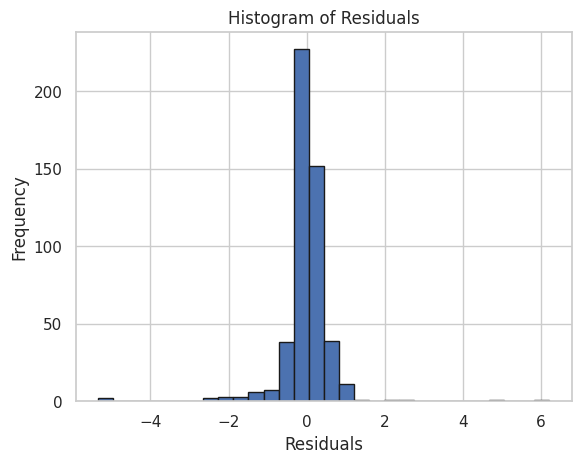

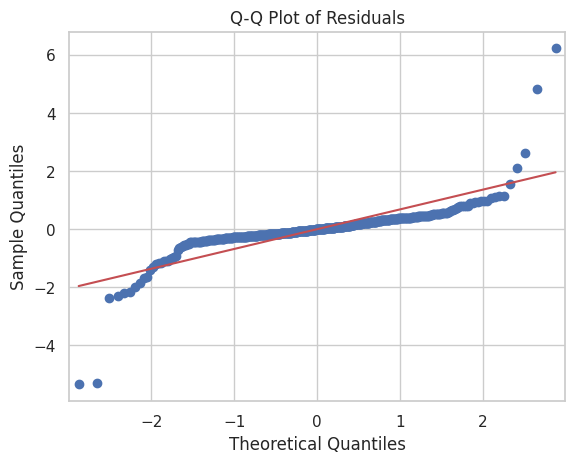

In [70]:
# Remove the outliers to see if it fixes the Jaqrue-Bera test

# visual inspection
import matplotlib.pyplot as plt

# Calculate residuals from the regression model
residuals = model_new.resid

plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [71]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# check for outliers
numeric_columns = corruption_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# create subplots, one for each numeric column
fig = make_subplots(rows=1, cols=len(numeric_columns),
                    subplot_titles=numeric_columns)

for i, col in enumerate(numeric_columns):
    fig.add_trace(
        go.Box(y=corruption_df[col], name=col),
        row=1, col=i+1
    )

fig.update_layout(
    title_text="Boxplots to Check for Outliers",
    height=600,
    width=200 * len(numeric_columns),  # Adjust width based on number of plots
    showlegend=False
)

fig.update_xaxes(visible=False)  # Hide x-axis labels as they're not needed for boxplots

fig.show()

def remove_outliers(df, columns):
    df_clean = df.copy()  # Create a copy of the DataFrame
    total_removed = 0
    total_data = len(final_df) * len(columns)

    # print summary statistics for each numeric column
    for column in columns:
        # Check if the column exists in the DataFrame before processing it:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)  # Use df instead of final_df
            Q3 = df[column].quantile(0.75)  # Use df instead of final_df
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

            # Use df_clean instead of final_df_clean:
            df_clean = df_clean[~df_clean.index.isin(outliers.index)]

            num_removed = len(outliers)
            total_removed += num_removed

            print(f"Column {column}:")
            print(f"  Number of outliers removed: {num_removed}")
            print(f"  Percentage of data removed: {(num_removed / len(df)) * 100:.2f}%")
            print("--------------------")
        else:
            print(f"Column '{column}' not found in DataFrame, skipping.")

    overall_percentage = (total_removed / total_data) * 100
    print(f"\nOverall percentage of data points removed: {overall_percentage:.2f}%")
    print(f"Number of rows in original dataset: {len(df)}")
    print(f"Number of rows in cleaned dataset: {len(df_clean)}")

    return df_clean #return the cleaned dataframe

numeric_columns = ['log_GDPC', 'log_AID', 'FDI', 'WAR', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']

# display original DataFrame shape
print("Original dataset shape:", final_df.shape)

# remove outliers - be careful with this one!!!
data_df_clean = remove_outliers(final_df, numeric_columns)

# display cleaned DataFrame shape
print("Cleaned dataset shape:", data_df_clean.shape)

Original dataset shape: (495, 8)
Column log_GDPC:
  Number of outliers removed: 14
  Percentage of data removed: 2.83%
--------------------
Column log_AID:
  Number of outliers removed: 26
  Percentage of data removed: 5.25%
--------------------
Column 'FDI' not found in DataFrame, skipping.
Column WAR:
  Number of outliers removed: 0
  Percentage of data removed: 0.00%
--------------------
Column CC:
  Number of outliers removed: 8
  Percentage of data removed: 1.62%
--------------------
Column 'GE' not found in DataFrame, skipping.
Column 'PS' not found in DataFrame, skipping.
Column 'RQ' not found in DataFrame, skipping.
Column 'RL' not found in DataFrame, skipping.
Column 'VA' not found in DataFrame, skipping.

Overall percentage of data points removed: 0.97%
Number of rows in original dataset: 495
Number of rows in cleaned dataset: 458
Cleaned dataset shape: (458, 8)


In [88]:
# statistical codes; shows that removal of outliers did not change statistical significance
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print('Shapiro-Wilk Test: Statistics=%.3f, p-value=%.3f' % (stat, p))

from scipy.stats import kstest

stat, p = kstest(residuals, 'norm')
print('Kolmogorov-Smirnov Test: Statistics=%.3f, p-value=%.3f' % (stat, p))

Shapiro-Wilk Test: Statistics=0.655, p-value=0.000
Kolmogorov-Smirnov Test: Statistics=0.263, p-value=0.000


In [89]:
import statsmodels.api as sm

# Fit your model on the correct DataFrame (final_df)
model = sm.OLS(final_df['log_GDPC'], sm.add_constant(final_df[['log_AID', 'WAR', 'log_FDI', 'CC', 'PC1', 'PC2']])).fit()
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Now filter with the correctly sized cooks_d
data_no_outliers = final_df[cooks_d < 1]  # Remove influential points

                            GLS Regression Results                            
Dep. Variable:               log_GDPC   R-squared:                       0.828
Model:                            GLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     366.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.33e-199
Time:                        16:14:39   Log-Likelihood:                -515.24
No. Observations:                 543   AIC:                             1046.
Df Residuals:                     535   BIC:                             1081.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2802      0.190     -1.479   

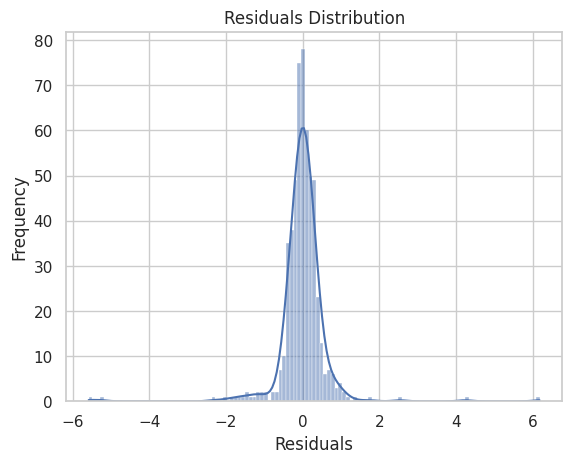

In [90]:
# Attempting GLS version of regression
import pandas as pd
import numpy as np
import statsmodels.api as sm

y = final_df['log_GDPC']
X = final_df[['log_AID', 'WAR', 'log_FDI', 'CC', 'PC1', 'PC2', 'log_GDPC_lag']]

# Add a constant to the independent variables
X = sm.add_constant(X)

covariance_matrix = np.eye(len(y))

gls_model = sm.GLS(y, X, sigma=covariance_matrix).fit()

# Display the summary of the model
print(gls_model.summary())

# Check residuals
residuals = gls_model.resid

# plot residuals/ perform further diagnostics
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Trial 3

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load the dataset
corruption_df = pd.read_csv('/content/drive/MyDrive/MS Data Analytics/FALL SEMESTER/MSA550/PROJECT/Corruption Data.csv')
x = corruption_df.drop(columns=['Country', 'GDPC'])
y = corruption_df['GDPC']
print(corruption_df.head(10))

# review the data types after cleaning
print(data.dtypes)